# Ensemble Techniques - Travel Package Purchase Prediction

## Description

## Background and Context

- You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

- A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

- One of the ways to expand the customer base is to introduce a new offering of packages.

- Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

- However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

- The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

- However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

## Objective

- To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- PreferredLoginDevice: Preferred login device of the customer in last month
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: Customer passport flag
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer


### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer



## <u> Criteria Perform an Exploratory Data Analysis on the data</u>
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

###  Points : 7.5

## <u> Criteria Illustrate the insights based on EDA</u>
Key meaningful observations on the relationship between variables
###  Points : 5

## <u> Criteria Data Pre-processing</u>
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling
###  Points : 7.5

## <u> Criteria Model building - Bagging</u>
- Build bagging classifier, random forest and decision tree.
###  Points : 6

## <u> Criteria Model performance evaluation and improvement</u>
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment
###  Points : 9

## <u> Criteria Model building - Boosting</u>
- Build Adaboost, gradient boost, xgboost and stacking classifier
###  Points : 8

## <u> Criteria Model performance evaluation and improvement</u>
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment
###  Points : 12

## <u> Criteria Actionable Insights & Recommendations</u>
- Compare models - Business recommendations and insights
###  Points : 5


##  Total Points : 	60

## Index

- <a href = #link1>Overview of the dataset </a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split the dataset</a>


- <a href = #link4>Decision Tree Model </a> 


- <a href = #link5>Random Forest Model</a>


- <a href = #link6>Boosting Models</a>


- <a href = #link7>Stacking Model</a>


- <a href = #link8>Business Recommendations</a>

## <a id = "link1"></a> Overview of the dataset 

**Let's start by importing libraries we need.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
#Loading dataset
# data = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

xls = pd.ExcelFile('Tourism.xlsx')
datadictonary = pd.read_excel(xls, 'Data Dict')
data = pd.read_excel(xls, 'Tourism')



**View the first 5 rows of the dataset.**

In [3]:
data.head()

CustomerID  ProdTaken   Age PreferredLoginDevice  CityTier  \
0      200000          1  41.0         Self Enquiry         3   
1      200001          0  49.0      Company Invited         1   
2      200002          1  37.0         Self Enquiry         1   
3      200003          0  33.0      Company Invited         1   
4      200004          0   NaN         Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisited  \
0              6.0        Salaried  Female                      3   
1             14.0        Salaried    Male                      3   
2              8.0     Free Lancer    Male                      3   
3              9.0        Salaried  Female                      2   
4              8.0  Small Business    Male                      2   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0   Super Deluxe                    3.0        Single   
1                4.0   Super Deluxe                    4.0      Divorced   
2                4.0          Multi                    3.0        Single   
3                3.0          Multi                    3.0      Divorced   
4                3.0          Multi                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisited Designation  MonthlyIncome  
0                      0.0     Manager        20993.0  
1                      2.0     Manager        20130.0  
2                      0.0   Executive        17090.0  
3                      1.0   Executive        17909.0  
4                      0.0   Executive        18468.0

**Check data types and number of non-null values for each column.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [5]:
data["PreferredLoginDevice"] = data["PreferredLoginDevice"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Designation"] = data["Designation"].astype("category")

### Observation
- We can see that there are total 19 columns and 4,888 number of rows in the dataset.
- 13 columns' data type is either integer or float, 6 columns - 'PreferredLoginDevice, Occupation, Gender, ProductPitched, MaritalStatus, Designation' which is of object type.
- The number of non-null value of each column is equal to number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.**

In [6]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

### Observation
- Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited, MonthlyIncome              columns are having null values  

In [7]:
data.median()

CustomerID                 202443.5
ProdTaken                       0.0
Age                            36.0
CityTier                        1.0
DurationOfPitch                13.0
NumberOfPersonVisited           3.0
NumberOfFollowups               4.0
PreferredPropertyStar           3.0
NumberOfTrips                   3.0
Passport                        0.0
PitchSatisfactionScore          3.0
OwnCar                          1.0
NumberOfChildrenVisited         1.0
MonthlyIncome               22347.0
dtype: float64

In [8]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
data = data.fillna(data.median())

In [9]:
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
PreferredLoginDevice       25
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisited       0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisited     0
Designation                 0
MonthlyIncome               0
dtype: int64

In [10]:
data.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
PreferredLoginDevice       category
CityTier                      int64
DurationOfPitch             float64
Occupation                 category
Gender                     category
NumberOfPersonVisited         int64
NumberOfFollowups           float64
ProductPitched             category
PreferredPropertyStar       float64
MaritalStatus              category
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisited     float64
Designation                category
MonthlyIncome               float64
dtype: object

**Summary of the dataset**

In [11]:
# Summary of continuous columns
data.describe().T

count           mean          std       min  \
CustomerID               4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                4888.0       0.188216     0.390925       0.0   
Age                      4888.0      37.547259     9.104795      18.0   
CityTier                 4888.0       1.654255     0.916583       1.0   
DurationOfPitch          4888.0      15.362930     8.316166       5.0   
NumberOfPersonVisited    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups        4888.0       3.711129     0.998271       1.0   
PreferredPropertyStar    4888.0       3.577946     0.797005       3.0   
NumberOfTrips            4888.0       3.229746     1.822769       1.0   
Passport                 4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore   4888.0       3.078151     1.365792       1.0   
OwnCar                   4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisited  4888.0       1.184738     0.852323       0.0   
MonthlyIncome            4888.0   23559.179419  5257.862921    1000.0   

                               25%       50%        75%       max  
CustomerID               201221.75  202443.5  203665.25  204887.0  
ProdTaken                     0.00       0.0       0.00       1.0  
Age                          31.00      36.0      43.00      61.0  
CityTier                      1.00       1.0       3.00       3.0  
DurationOfPitch               9.00      13.0      19.00     127.0  
NumberOfPersonVisited         2.00       3.0       3.00       5.0  
NumberOfFollowups             3.00       4.0       4.00       6.0  
PreferredPropertyStar         3.00       3.0       4.00       5.0  
NumberOfTrips                 2.00       3.0       4.00      22.0  
Passport                      0.00       0.0       1.00       1.0  
PitchSatisfactionScore        2.00       3.0       4.00       5.0  
OwnCar                        0.00       1.0       1.00       1.0  
NumberOfChildrenVisited       1.00       1.0       2.00       3.0  
MonthlyIncome             20485.00   22347.0   25424.75   98678.0

- DurationOfPitch, NumberOfTrips, MonthlyIncome are outliers
- Target variable seems to have skewed distribution as higher values are on the right. We will explore this further.

### Univariate and Bivariate Analysis
To do - Identify insights if any from the distributuions.

**Number of unique values in each column**

In [12]:
data.shape

(4888, 20)

In [13]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
PreferredLoginDevice          2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

- We can drop 'instant' column as it is an ID variable and will not add value to the model.
- We can drop 'dteday' column as it just contains dates of 731 days i.e. 2 years. This will not add value to the model.

**Number of observations in each category**

In [15]:
cat_cols=['ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation']

for column in cat_cols:
    print('--**'*10)
    print(data[column].value_counts())
    print('**--'*10)

--**--**--**--**--**--**--**--**--**--**
0    3968
1     920
Name: ProdTaken, dtype: int64
**--**--**--**--**--**--**--**--**--**--
--**--**--**--**--**--**--**--**--**--**
36.0    457
35.0    237
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**--**--**--**--**--**--**--**--**--**--
--**--**--**--**--**--**--**--**--**--**
Self Enquiry       3444
Company Invited    1419
Name: PreferredLoginDevice, dtype: int64
**--**--**--**--**--**--**--**--**--**--
--**--**--**--**--**--**--**--**--**--**
1    3190
3    1500
2 

### Summary & Observation

* Product taken flag count: 0 - 3968 &  1 - 920

* Preferred login device of customer in last month: Self Enquiry - 3444, Company Invited - 1419
    - Self enquiry customers are more then compnay invited

* City tier:  (1 - 3190, 2 - 198, 3- 1500)
    - Maximum customer are from type 1 city 

* Occupation of customer: (Salaried - 2368, Small Business - 2084, Large Business - 434, Free Lancer - 2)
    - Occupation of maximum cutomers eirther Salaried or Small Business
    
* Gender of customer: (Male - 2916, Female - 1817, Fe Male - 155) 
    - More than 50% customers are male
    - 155 records data having value as "Fe Male" -  it is related to data entry issue so need to update the value from "Fe Male" to "Female"
    
* Total number of person came with customer: (1 - 39, 2 - 1418, 3 - 2402,  4 - 1026, 5 - 3)
    - Customer with 1 and 5 persons are very less

* Total number of follow up has been done by sales person after sales pitch: (1.0 - 176, 2.0 - 229, 3.0 - 1466, 4.0 - 2113, 5.0 - 768,   6.0 - 136)
    - Maximum follow-up by sales person either 3 or 4 times
    
* Product pitched by sales person - (Multi - 1842, Super Deluxe - 1732, Standard: 742, Deluxe - 342, King  - 230) 
    - Multi , Super Deluxe types of production choosed by majority of customers
     
* Preferred hotel property rating by customer: (3.0 - 3019, 4.0 - 913, 5.0 - 956)
    - Majority of customer would like to stayed in 3 stars property 

* Marital status of customer - (Married -2340, Divorced- 950, Single-   916, Unmarried-682)
    - Majority of customers are married
    
* Average number of trip in a year by customer: (1.0 -  620, 2.0 - 1464, 3.0 - 1219,  4.0 -  478, 5.0 -  458, 6.0 -  322, 7.0 -  218, 8.0 -  105, 19.0 -   1, 20.0 -   1 , 21.0 -   1,  22.0 -   1)
    - Evenly distributed. However, number of visits for 2 and 3 times are as majority.
    
* Customer passport flag - (0 - 3466, 1 - 1422)
    - Count of overseas customer are less 
    
* Sales pitch satisfactory score - (1 - 942, 2 - 586 , 3 - 1478,  4 - 912 , 5 - 970)
    - Evenly distributed customer. However, sales persons with 3 is maximum
    
* Customers owns a car flag - (1 - 3032, 0 - 1856)
    -  Customers owns a car as 1 are more, Howevere, It hardly matters
    
* Total number of children v
isit with customer - (0.0 - 1082, 1.0 - 2146, 2.0 - 1335,  3.0 -  325)
    -   Customers either wanted to visit alone or with 1 or 2  memeber are maximum
    
* Designation of customer in current organization - (Executive - 1842, Manager -   1732, Senior Manager - 742, AVP - 342, VP - 230)
    - Manily Executive and Manager are in Majority
    
* Age of customer, Duration of pitch by a sales man to customer 

#### Let update the value of Gender from Fe Male to Female 

In [16]:
# data[ np.logical_and(data.Gender=='Fe Male'), ['Gender'] ] = 'Female'
data.loc[(data.Gender == 'Fe Male'),'Gender']='Female'

In [17]:
print(data['Gender'].value_counts())

Male       2916
Female     1972
Fe Male       0
Name: Gender, dtype: int64


## <a id = "link2"></a> EDA

### Univariate analysis

**Histogram Plot and Box Plt after above Observations for all features**

<AxesSubplot:xlabel='Age', ylabel='Count'>

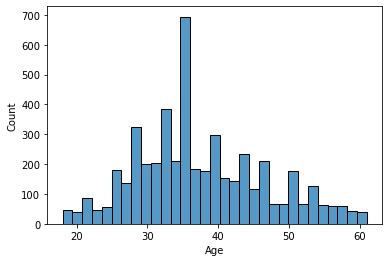

In [18]:
sns.histplot(data['Age'])

- Maximum customer are of age 35

<AxesSubplot:xlabel='CityTier', ylabel='Count'>

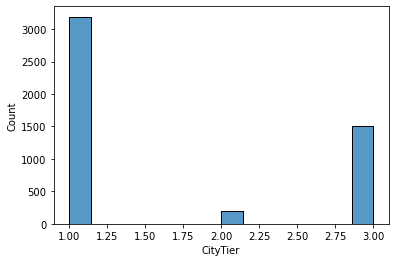

In [19]:
sns.histplot(data['CityTier'])

- Maximum Customer are from Type 1 city

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Count'>

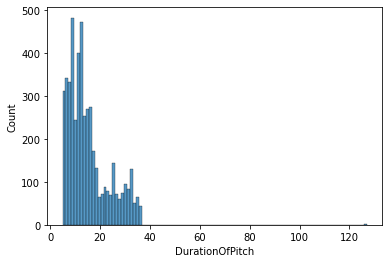

In [20]:
sns.histplot(data['DurationOfPitch'])

- Duration of pitch by a sales man to customer is below 40 and maximum count over 450 and under 10 

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

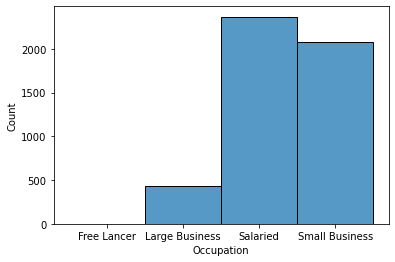

In [21]:
sns.histplot(data['Occupation'])

- Occupation of maximum cutomers eirther Salaried or Small Business
- Large is very as compare to Salaried or Small Business

<AxesSubplot:xlabel='Gender', ylabel='Count'>

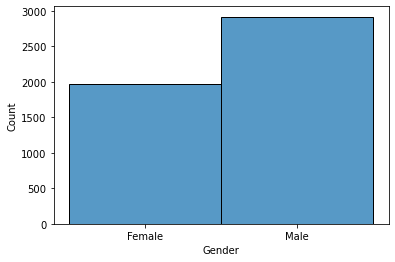

In [22]:
sns.histplot(data['Gender'])

- Male customers are more than 2500
- Female cutomers are less than 2000

<AxesSubplot:xlabel='NumberOfPersonVisited', ylabel='Count'>

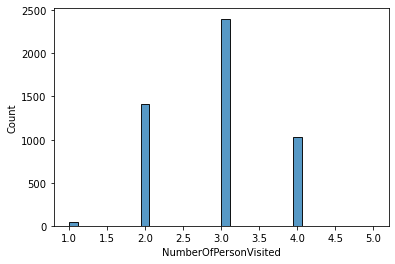

In [23]:
sns.histplot(data['NumberOfPersonVisited'])

- Over 2000 customers with 3 persons
- Over 1000 customers with 2 persons
- less then 1000 customers with 4 persons
- Customers with 1 persons are very less

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='Count'>

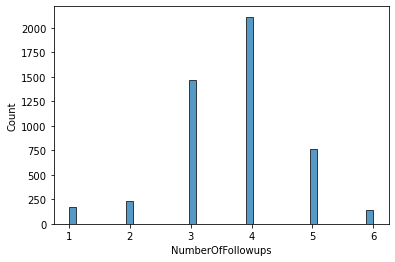

In [24]:
sns.histplot(data['NumberOfFollowups'])

 - 4 times follow-up done with over 2000 customers
 - 3 times follow-up done with over 1200 customers
 - 2 times follow-up done with over 750 customers
 - 1,2,6 times follow up with less customers

<AxesSubplot:xlabel='ProductPitched', ylabel='Count'>

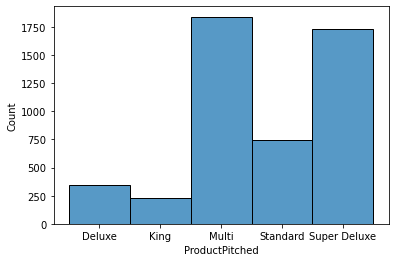

In [25]:
sns.histplot(data['ProductPitched'])

- Product type "Multi" pitched over 1750 time by sales person
- Product type "Super Deluxe" pitched less than 1750 time by sales person
- Others are less than 750 time  pitched sales person

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='Count'>

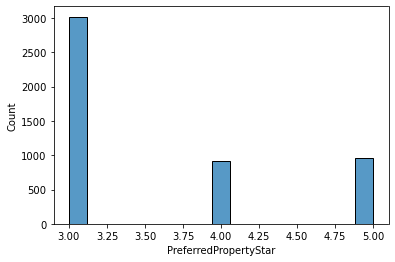

In [26]:
sns.histplot(data['PreferredPropertyStar'])

- Preferred hotel property rating by customer 
    - 3 star around 3000
    - 4 * 5 star is less then 1000 

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

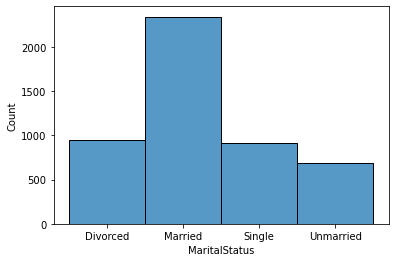

In [27]:
sns.histplot(data['MaritalStatus'])

- Marital status of customer 
    - Married over 2000
    - Single, Divorced, Unmarried is less then 1000 

<AxesSubplot:xlabel='NumberOfTrips', ylabel='Count'>

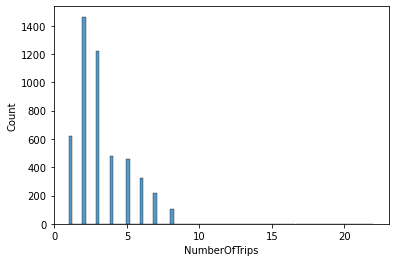

In [28]:
sns.histplot(data['NumberOfTrips'])

- Average number of trip in a year by customer
    - 2 trip over 1400
    - 3 trip over 1200
    - 1 trip for around 600
    - other less than 500

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='Count'>

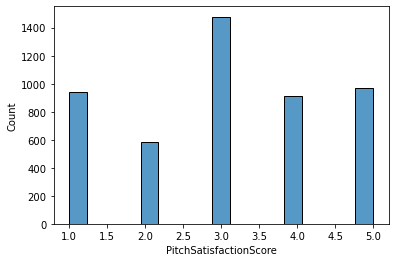

In [29]:
sns.histplot(data['PitchSatisfactionScore'])

- Sales pitch satisfactory score
    - 3 star for more than 1400
    - others are less than 1000

<AxesSubplot:xlabel='NumberOfChildrenVisited', ylabel='Count'>

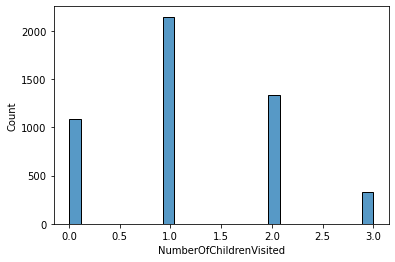

In [30]:
sns.histplot(data['NumberOfChildrenVisited'])

- Total number of children visit with customer
 - 2000 customer visited with 1 children 
 - customer visited with 2 children is over 1000
 - around 1000 customer visited with no children

<AxesSubplot:xlabel='Designation', ylabel='Count'>

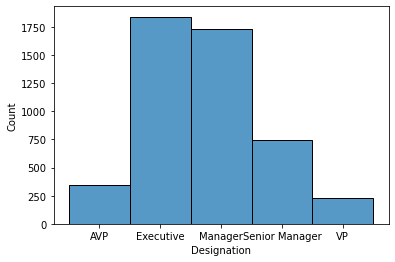

In [31]:
sns.histplot(data['Designation'])

- Designation of customer in current organization
    - Executive are over 1750
    - Managers are less than 1750

<AxesSubplot:xlabel='Age'>

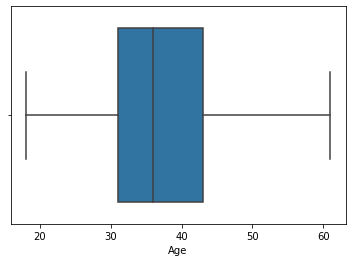

In [32]:
sns.boxplot(data['Age'])

- All customers age is from 30 to 45.
- No outlier

<AxesSubplot:xlabel='DurationOfPitch'>

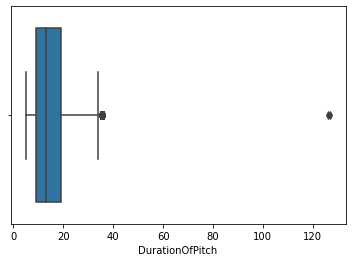

In [33]:
sns.boxplot(data['DurationOfPitch'])

- Duration of pitch by a sales man to customer 
    - have outliers

<AxesSubplot:xlabel='NumberOfPersonVisited'>

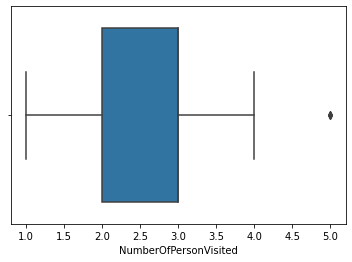

In [34]:
sns.boxplot(data['NumberOfPersonVisited'])

- Total number of person came with customer - 5 outliers

<AxesSubplot:xlabel='NumberOfFollowups'>

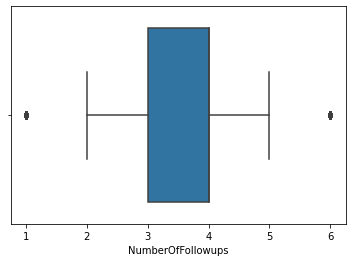

In [35]:
sns.boxplot(data['NumberOfFollowups'])

- Total number of follow up has been done by sales person after sales pitch
    - outliers on both sides
   

<AxesSubplot:xlabel='PreferredPropertyStar'>

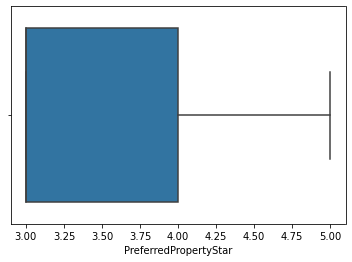

In [36]:
sns.boxplot(data['PreferredPropertyStar'])

- Preferred hotel property rating by customer
    - no outlers for choosein property
   

<AxesSubplot:xlabel='NumberOfTrips'>

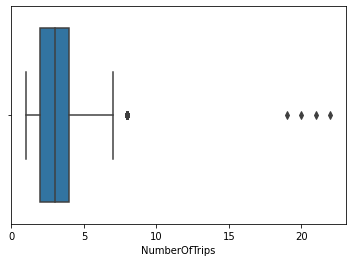

In [37]:
sns.boxplot(data['NumberOfTrips'])

- Average number of trip in a year by customer: outlier


In [38]:
#Top 5 highest values 
data['Age'].nlargest()

2855    61.0
2871    61.0
2980    61.0
3323    61.0
3653    61.0
Name: Age, dtype: float64

- Four customes of age 61

**Function to create barplots for each feature**

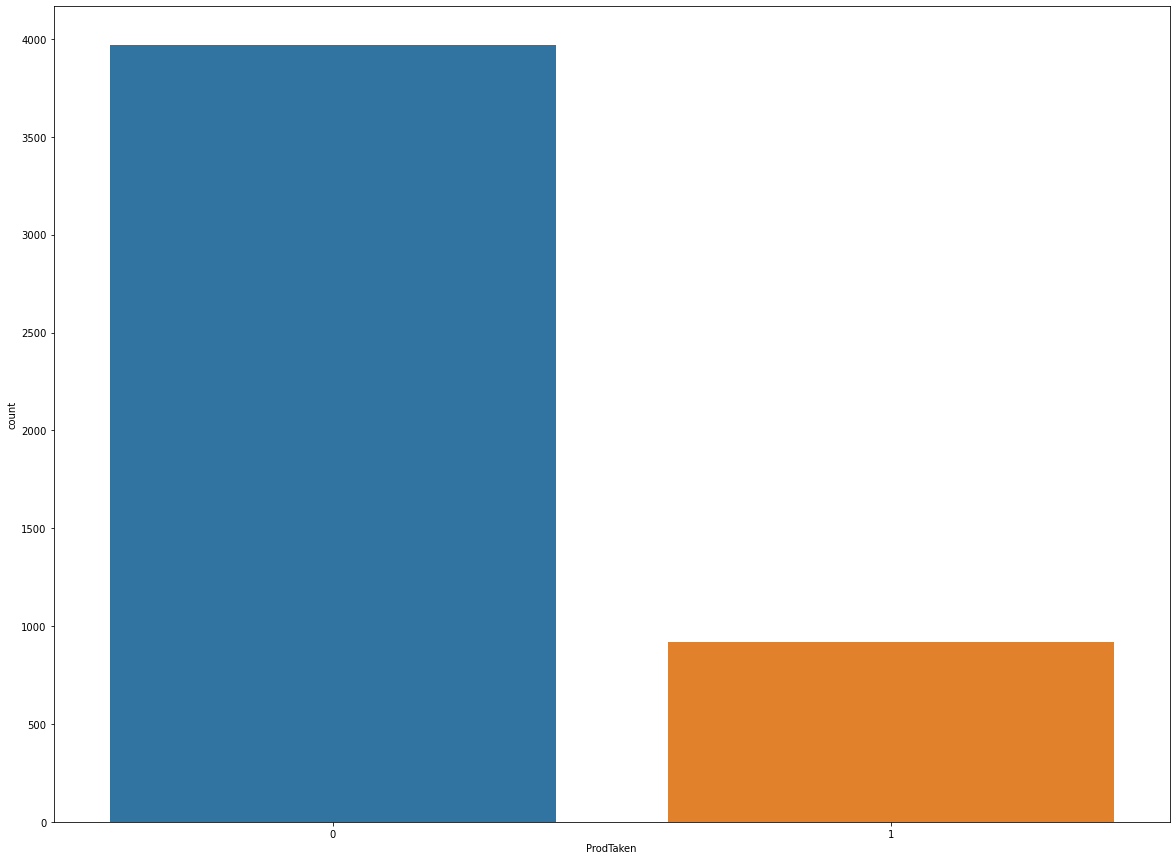

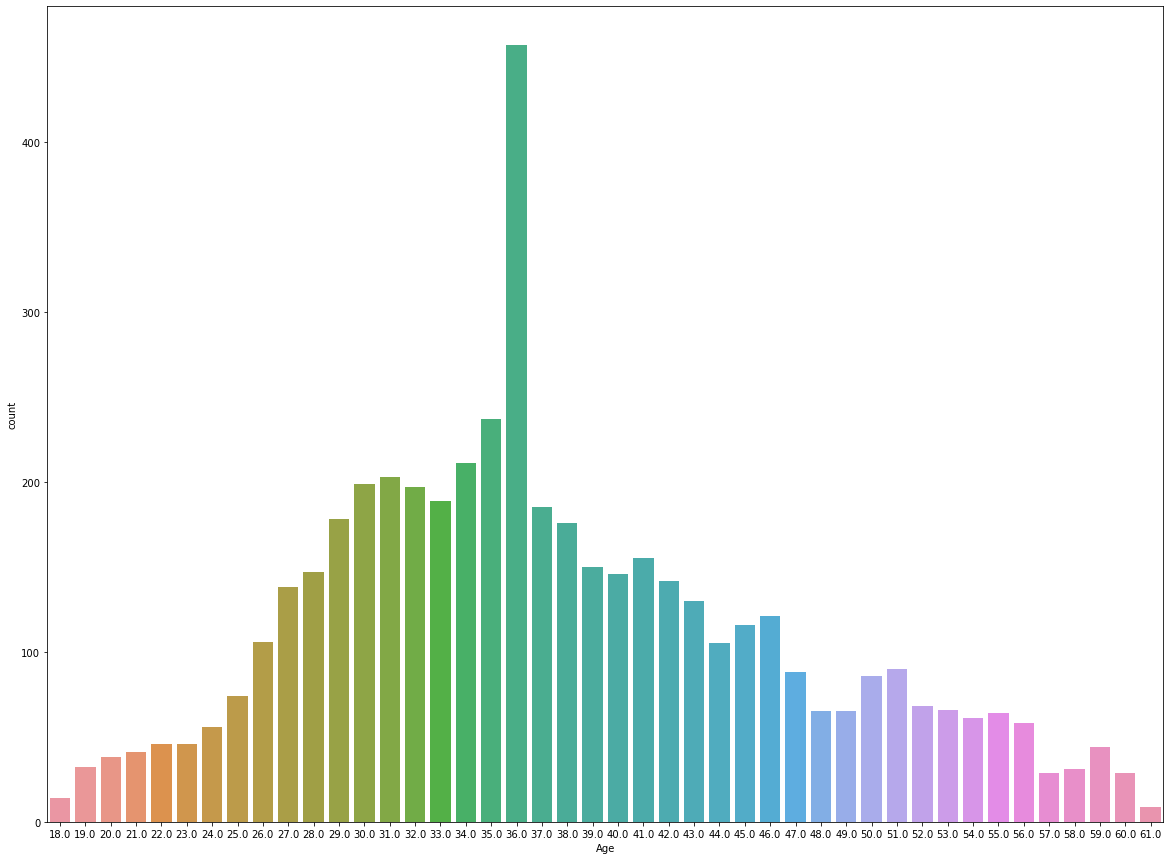

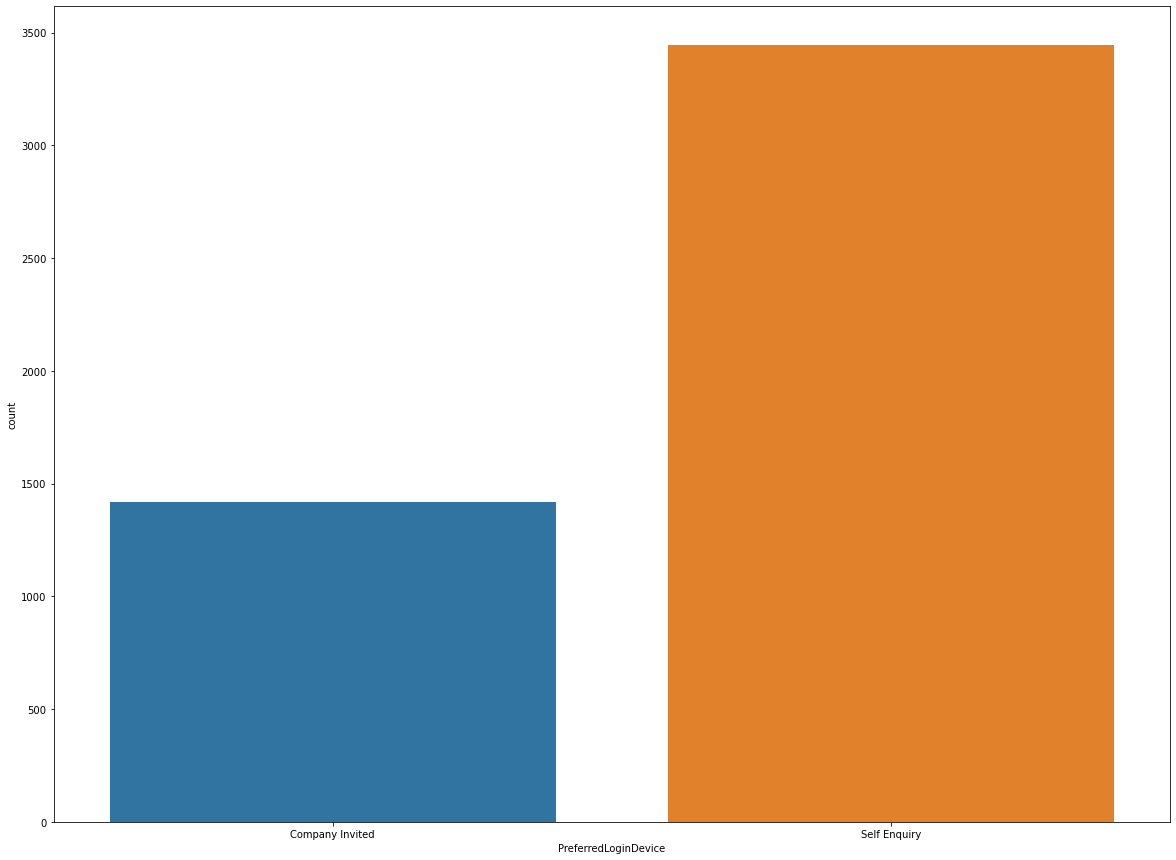

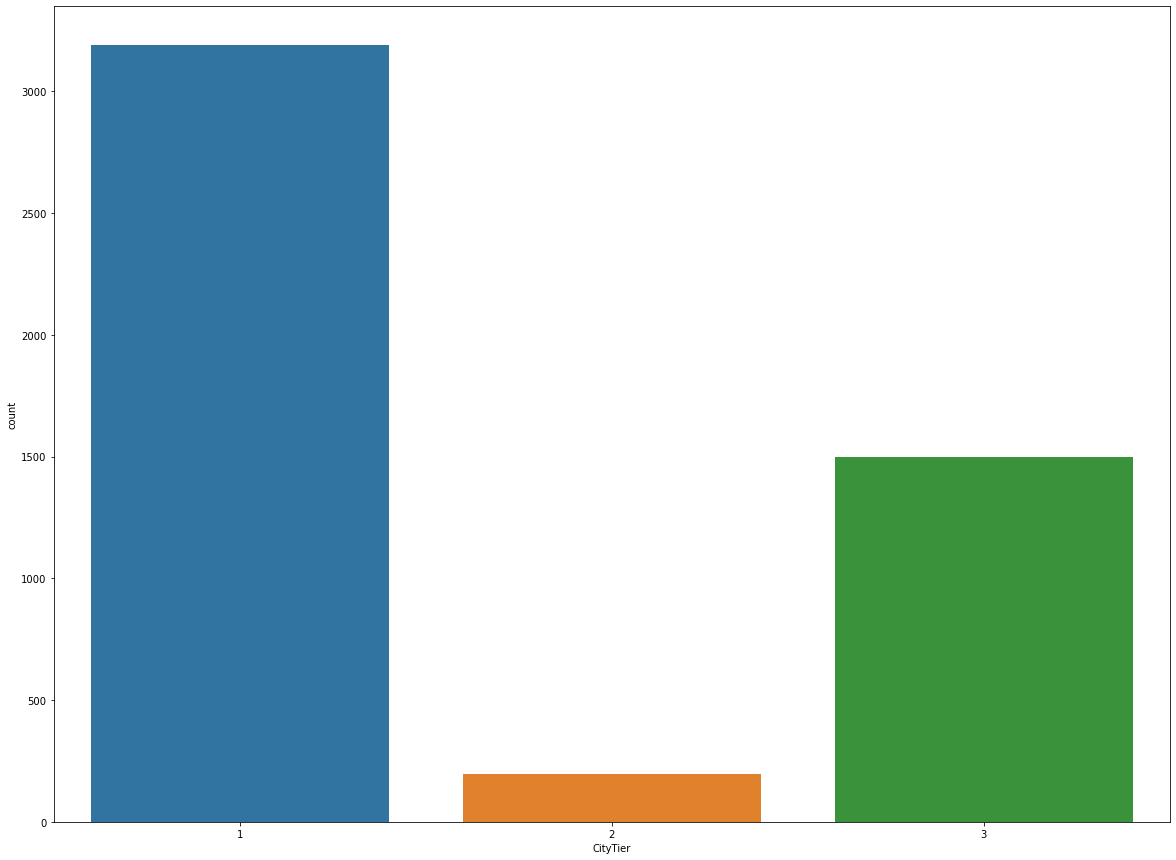

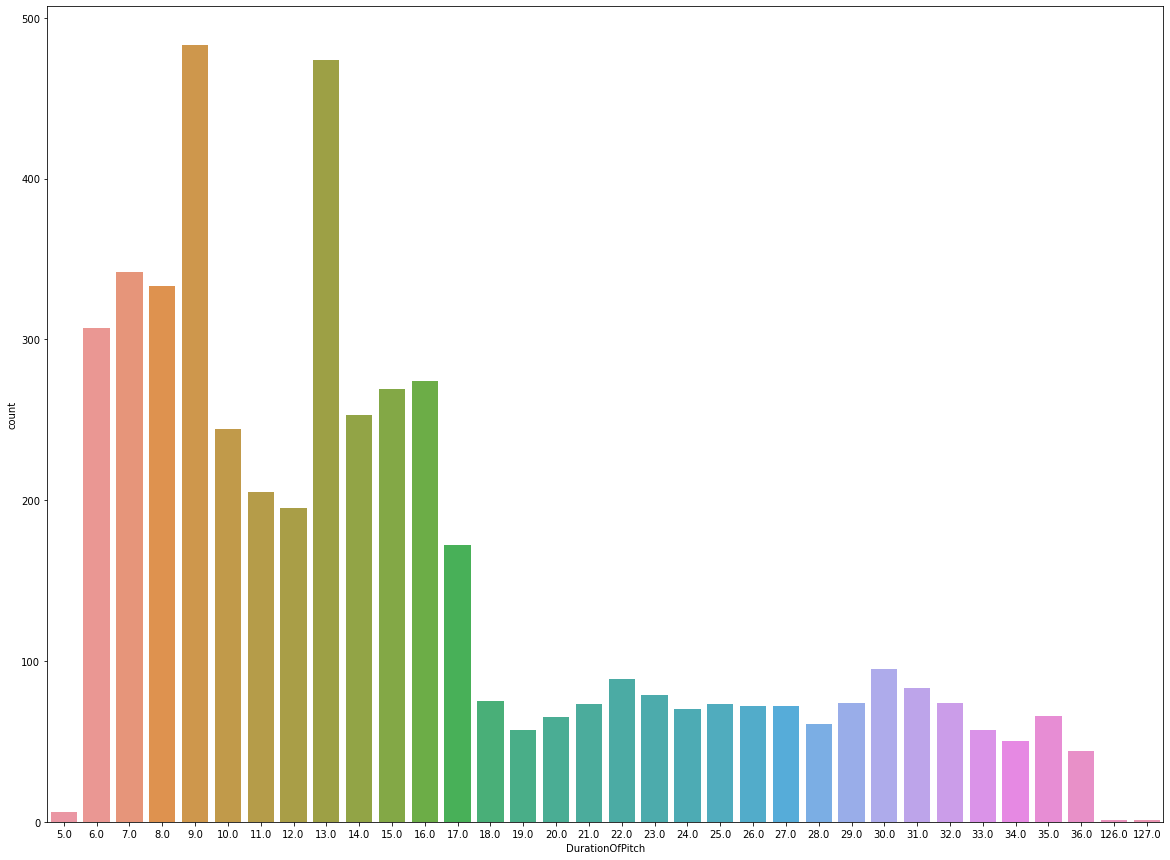

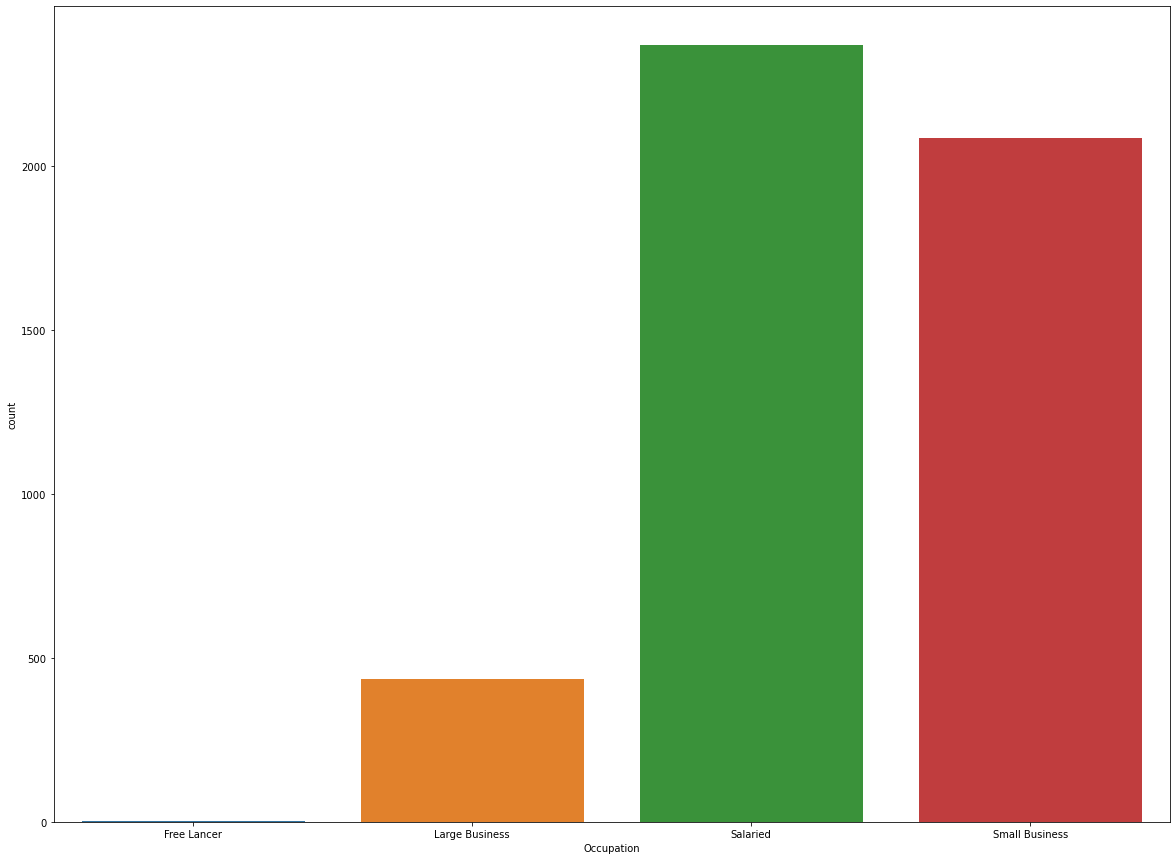

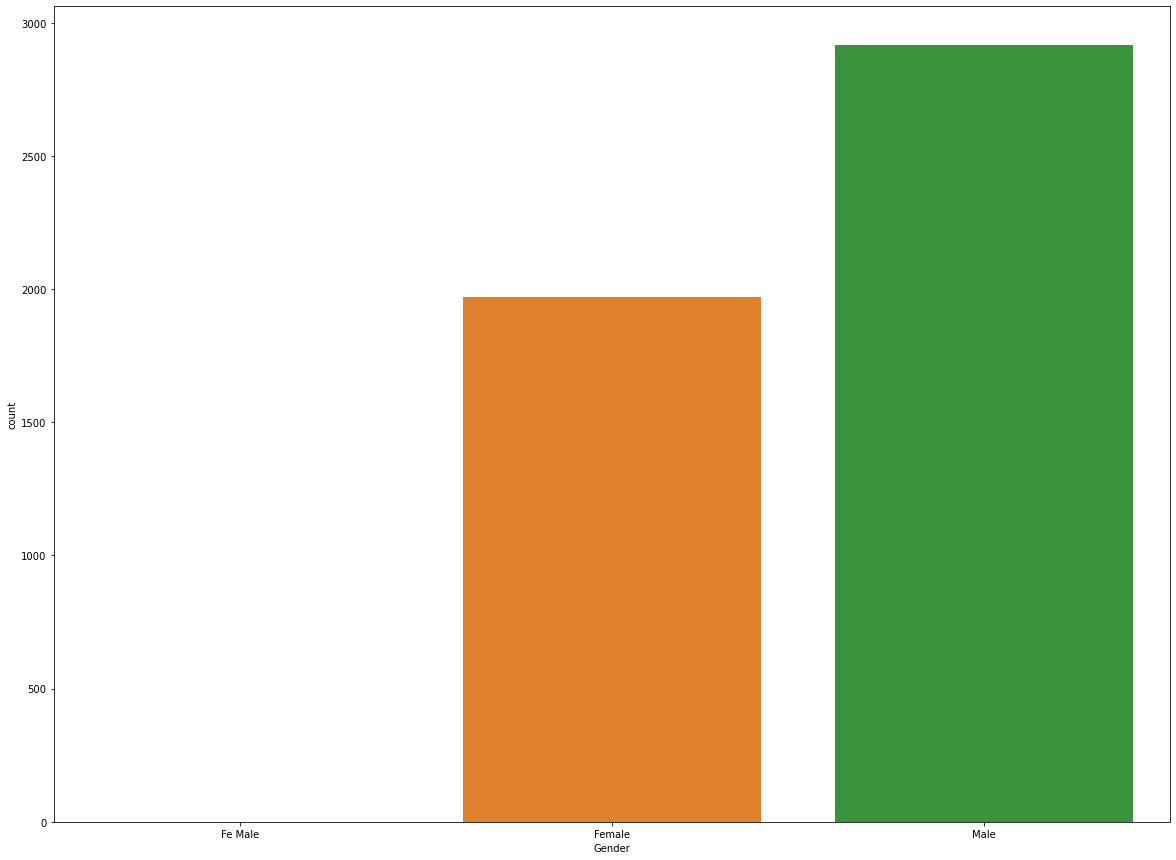

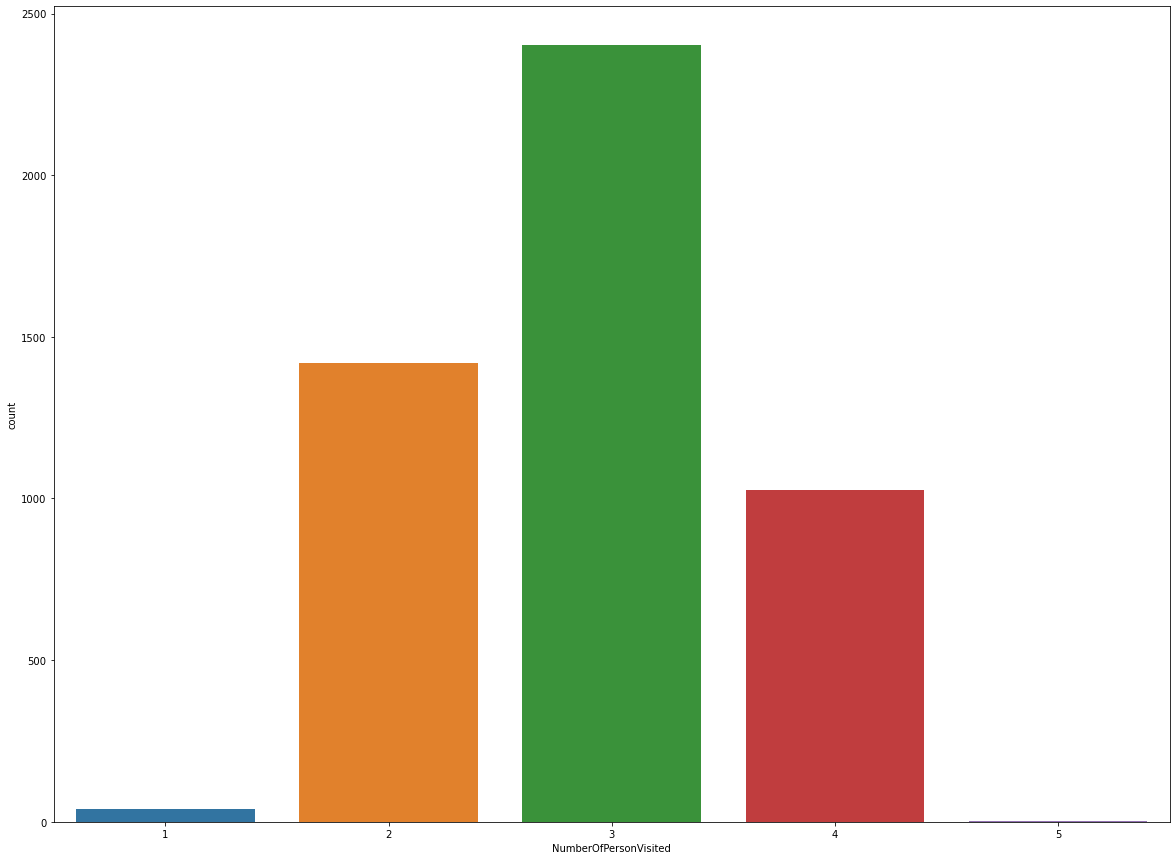

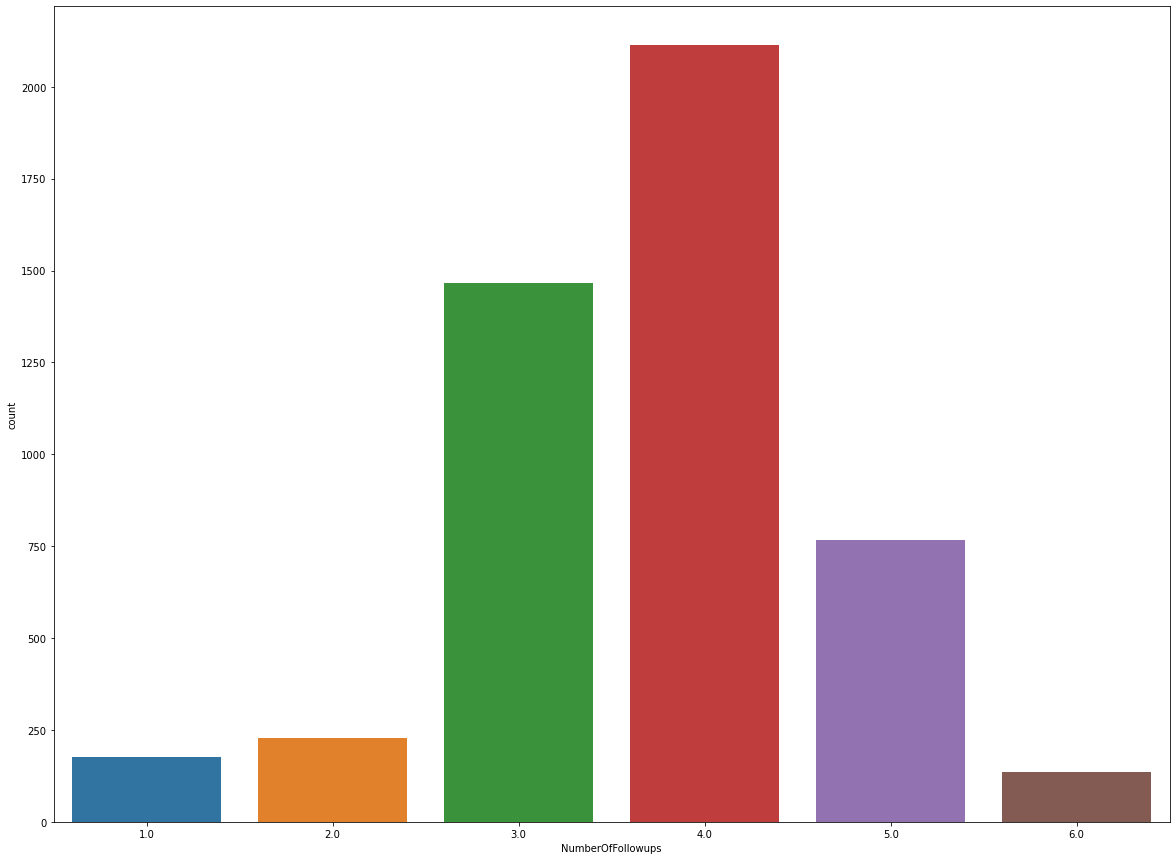

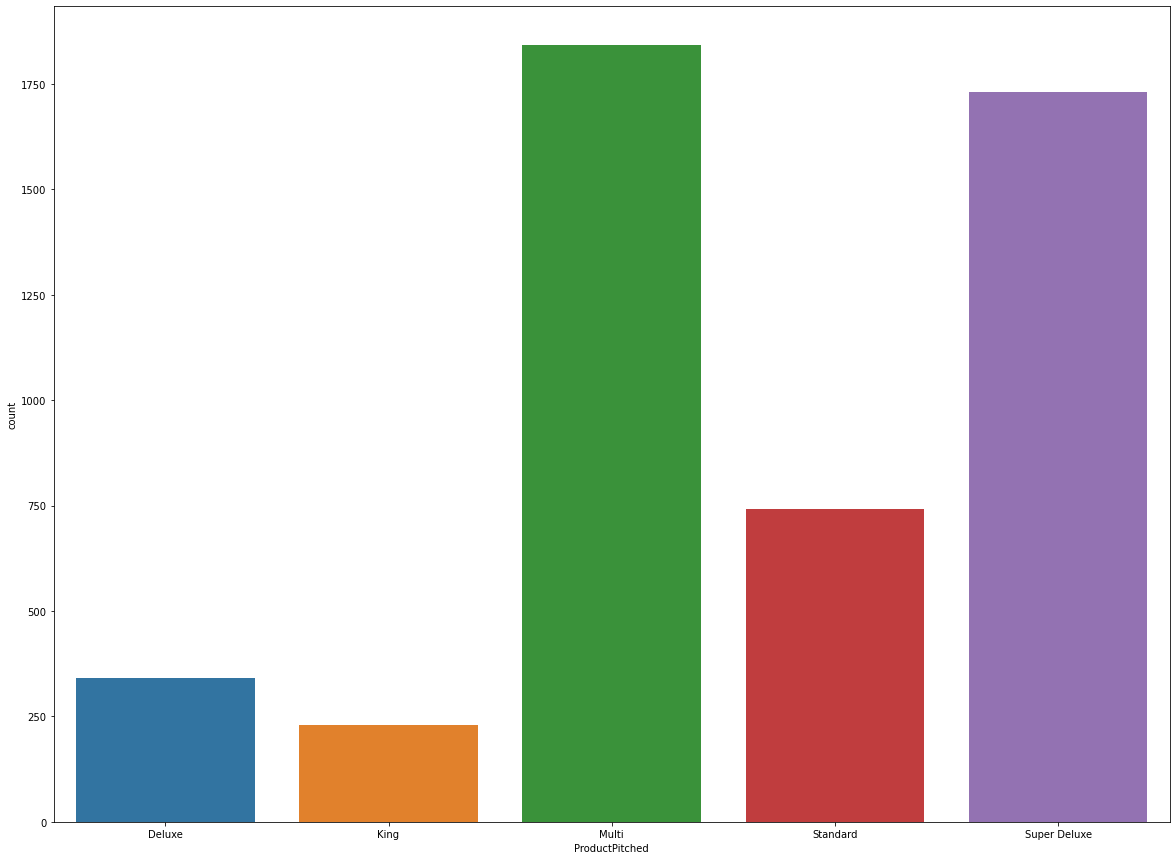

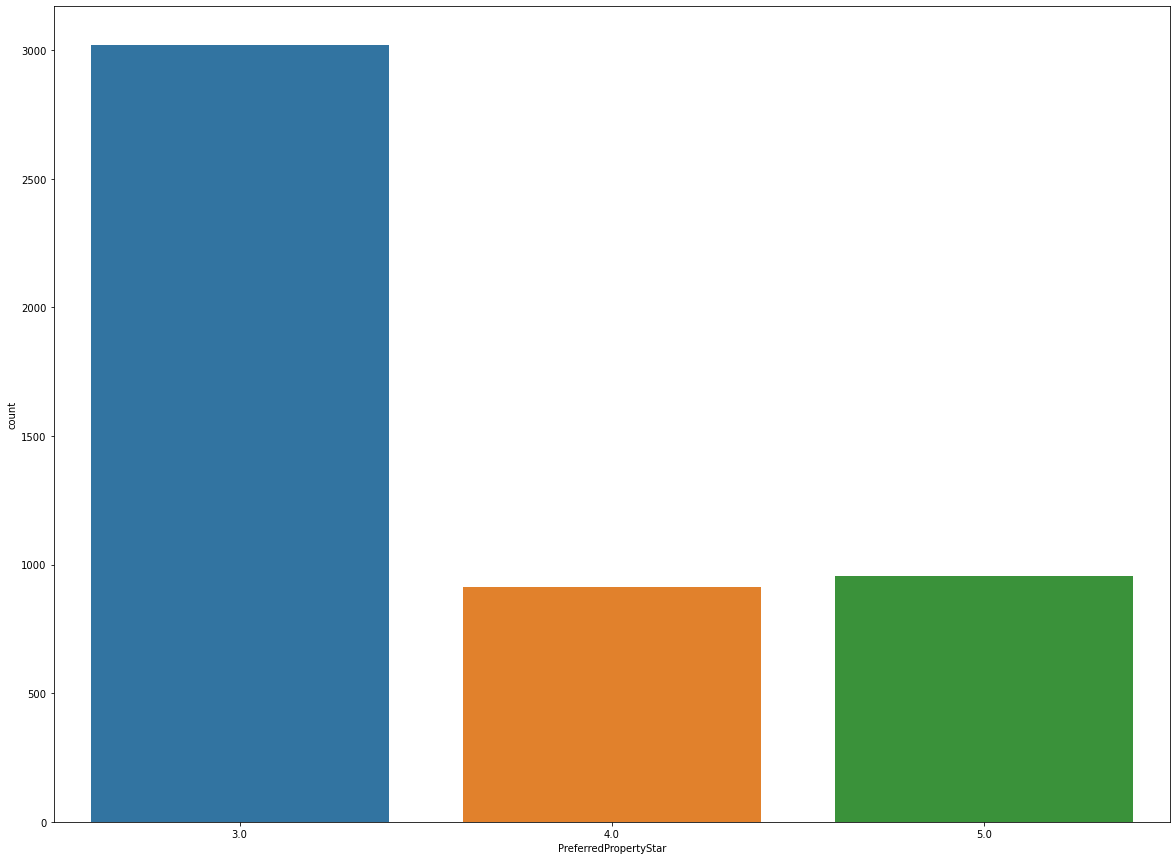

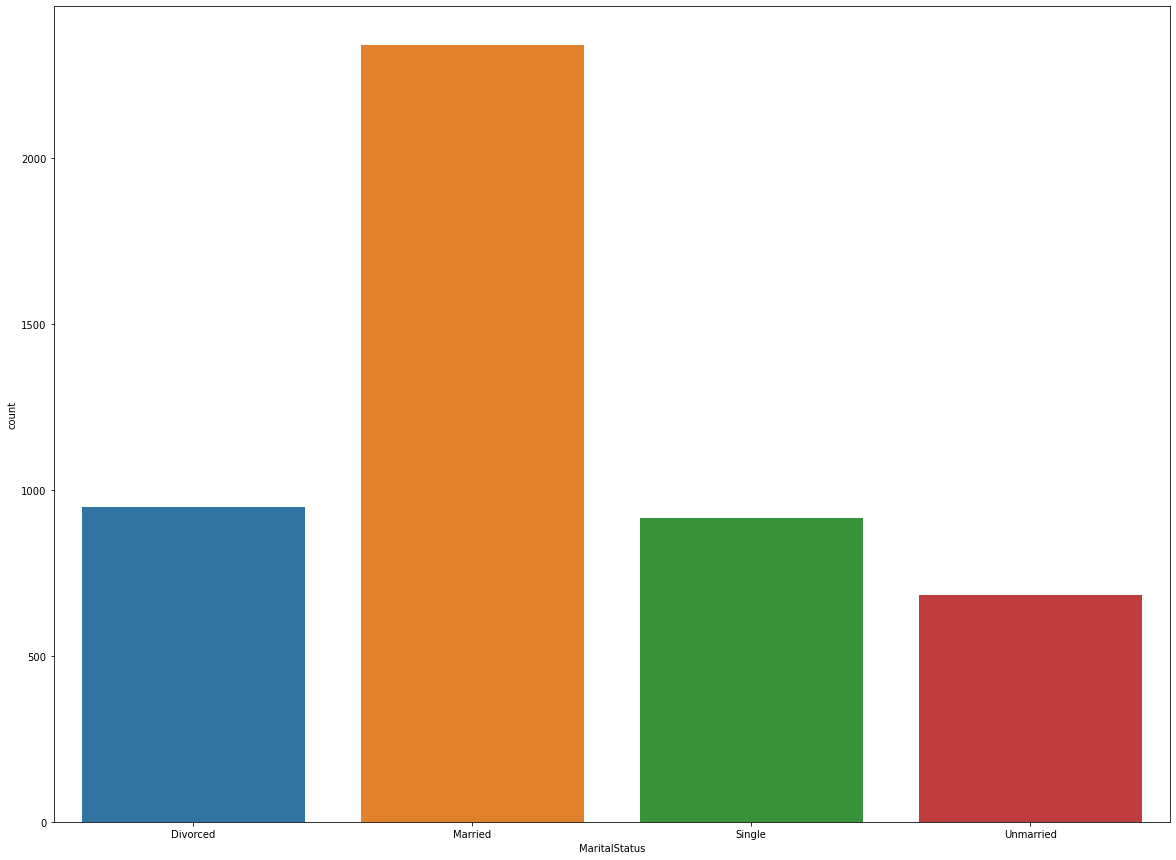

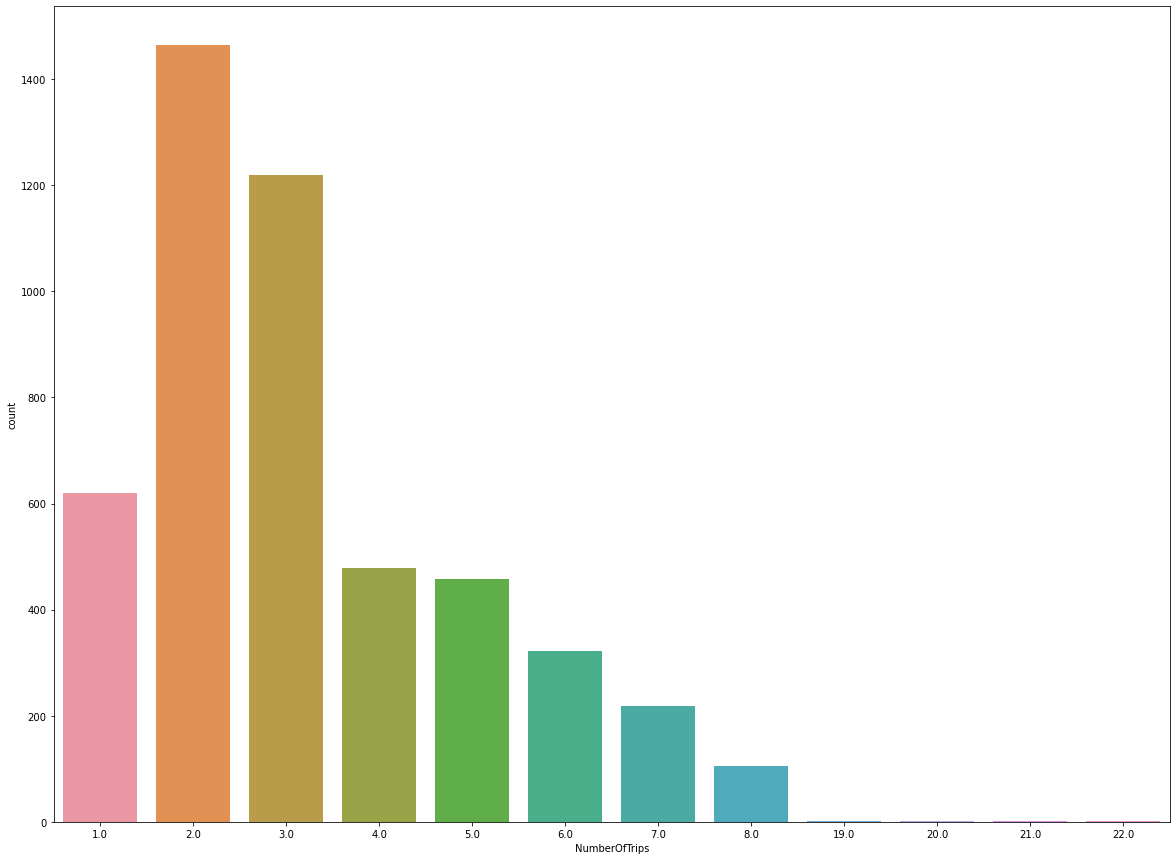

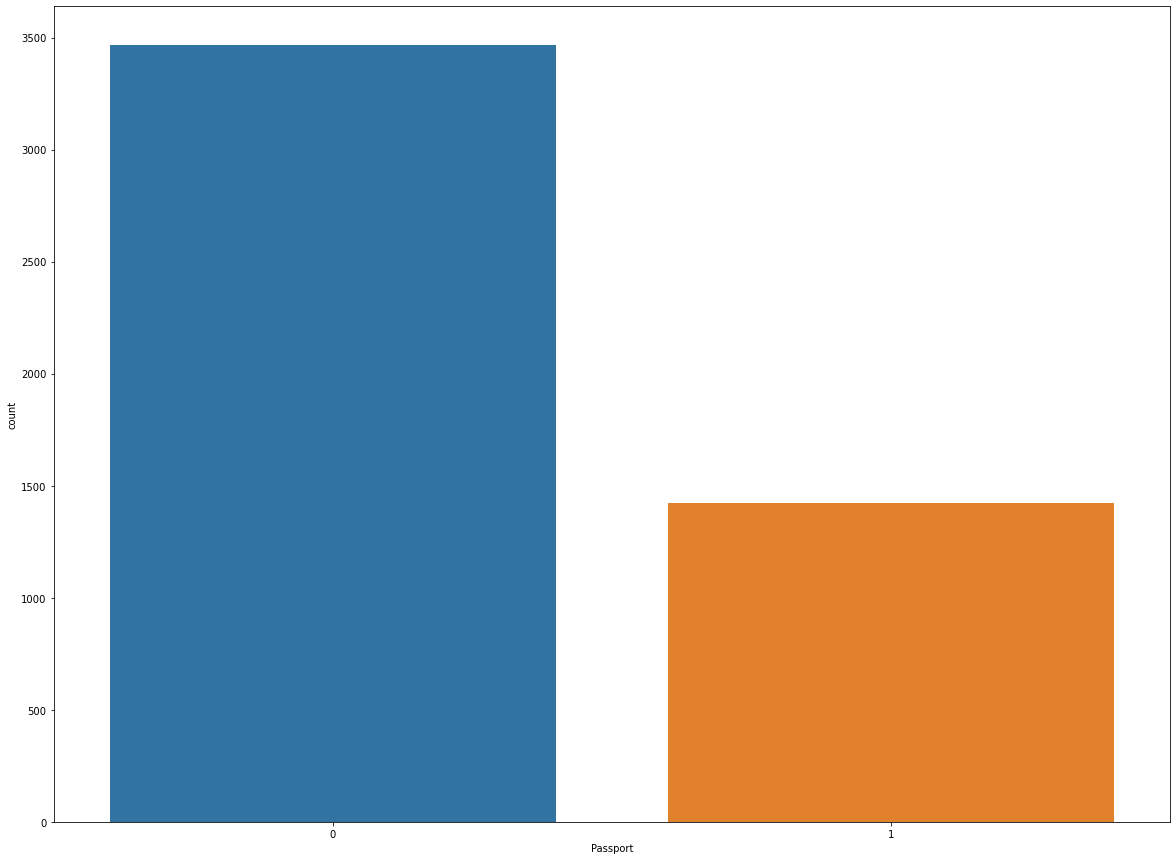

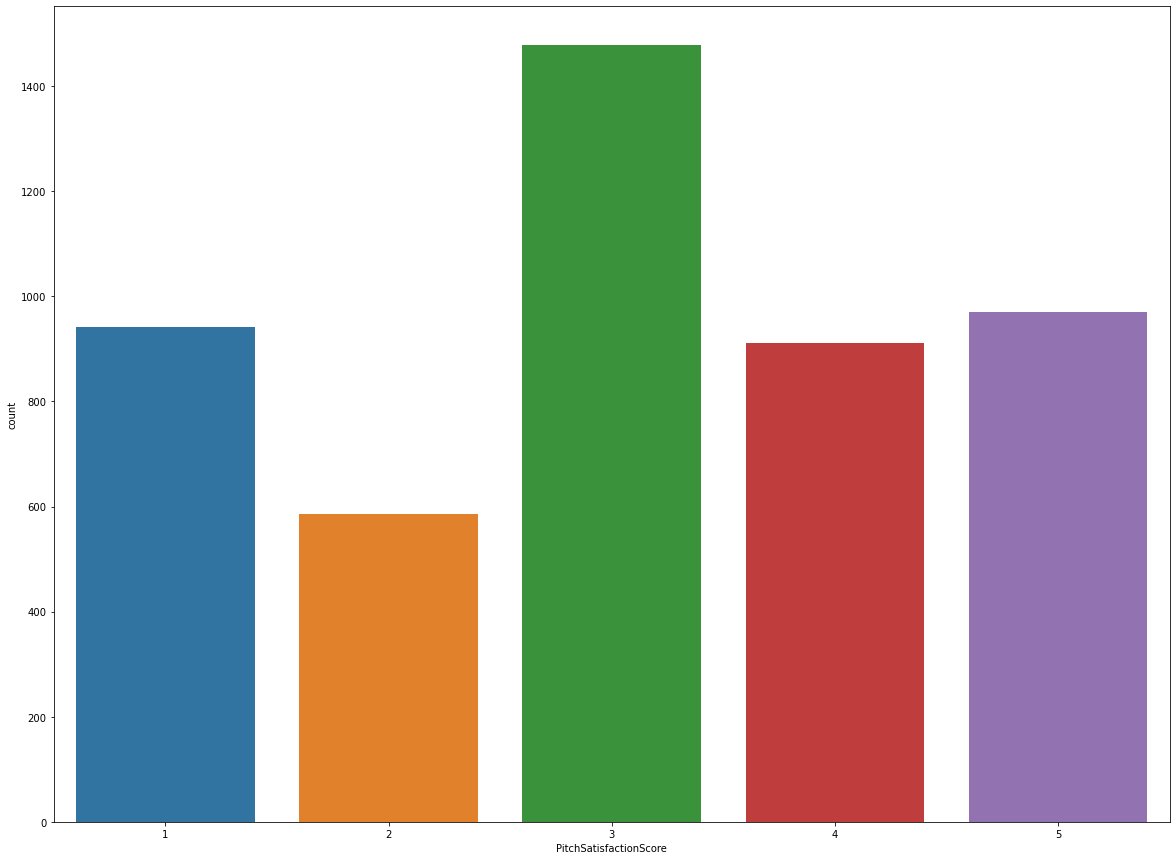

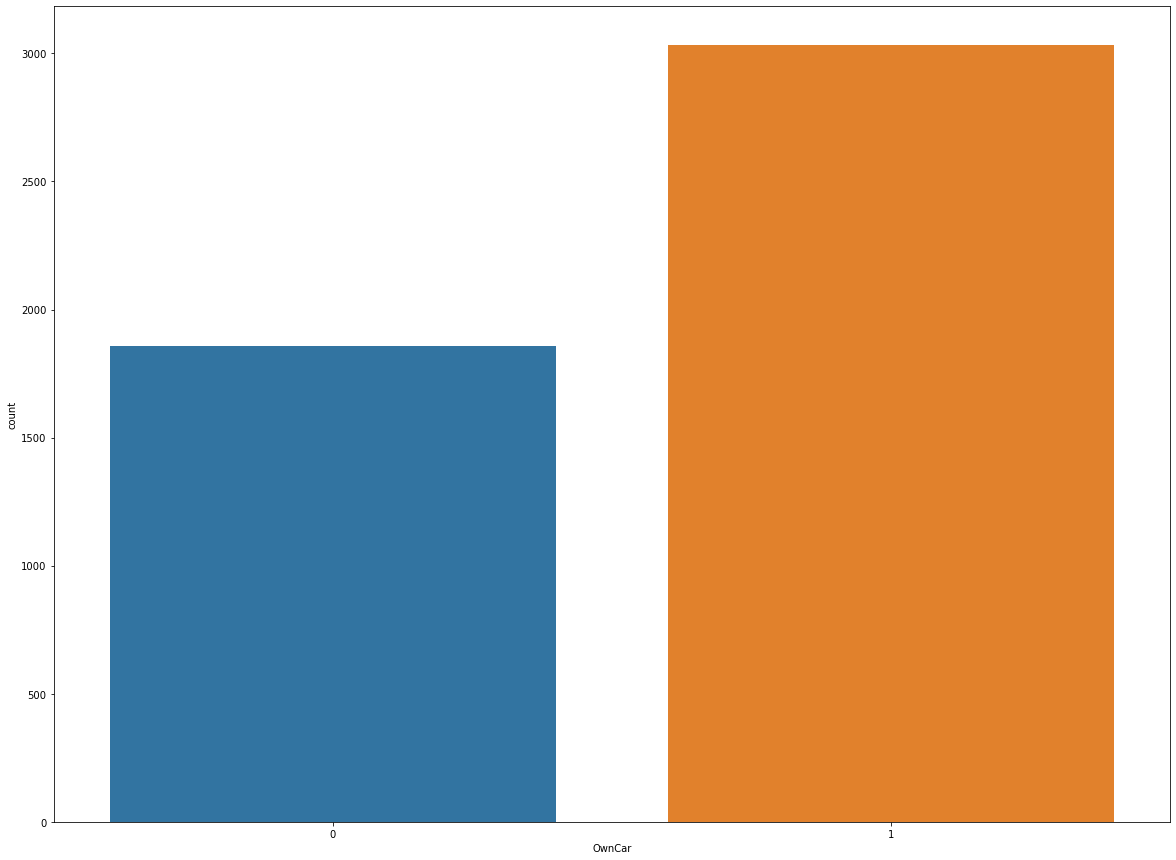

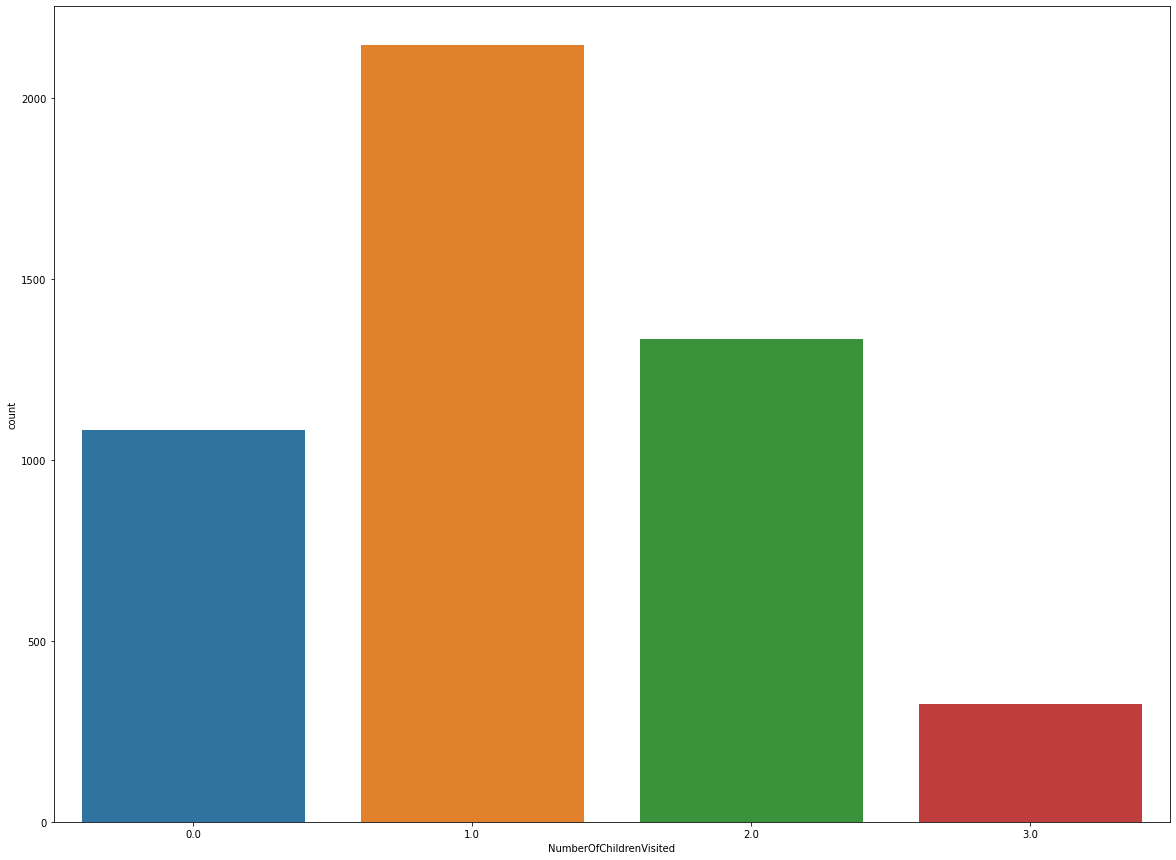

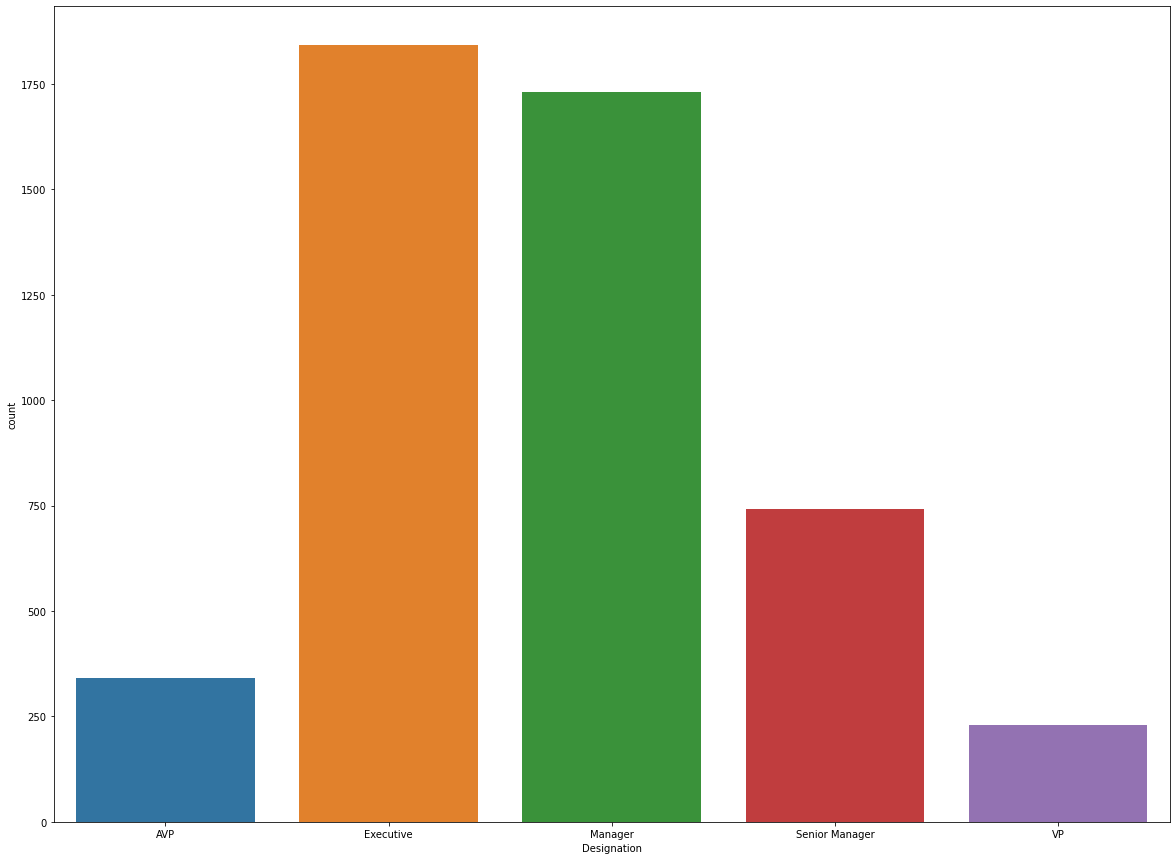

In [39]:
cat_cols=['ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation']

for column in cat_cols:
    plt.figure(figsize = (20,15))
    sns.countplot(data[column])
    plt.show()

### Bivariate analysis

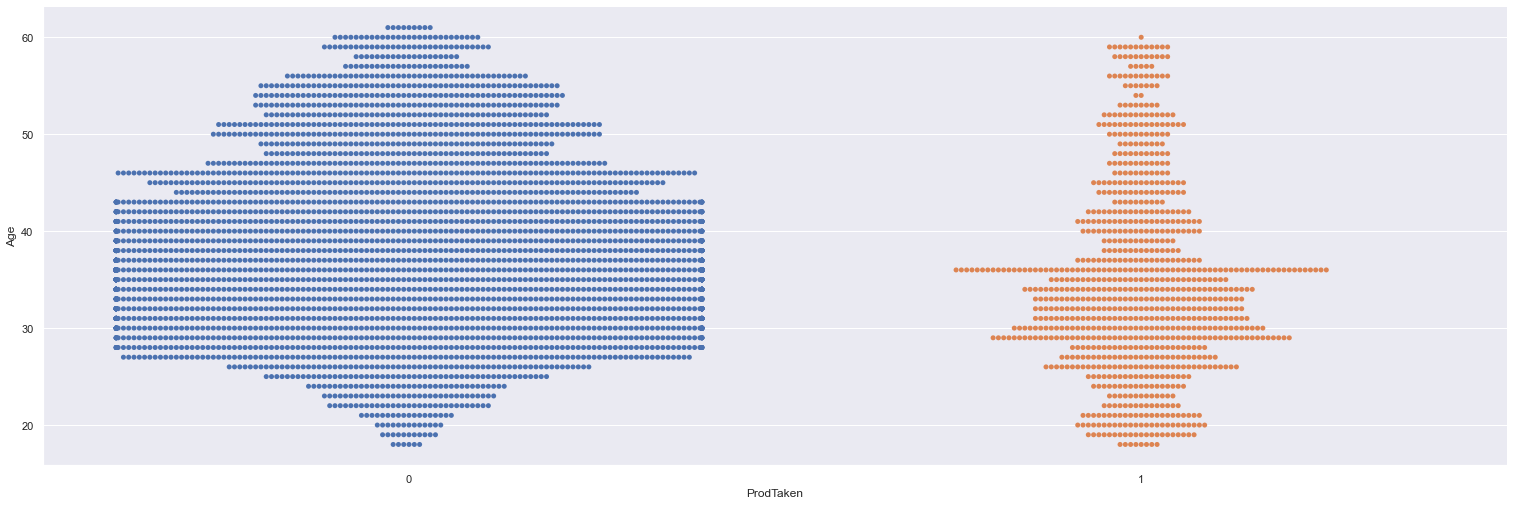

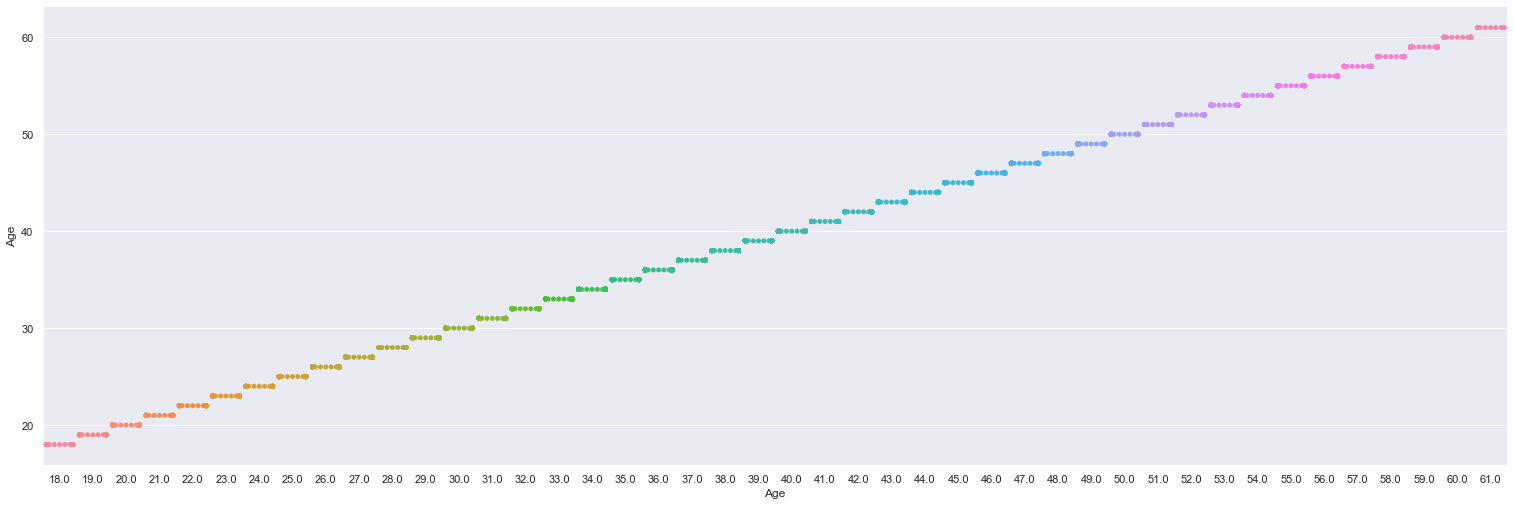

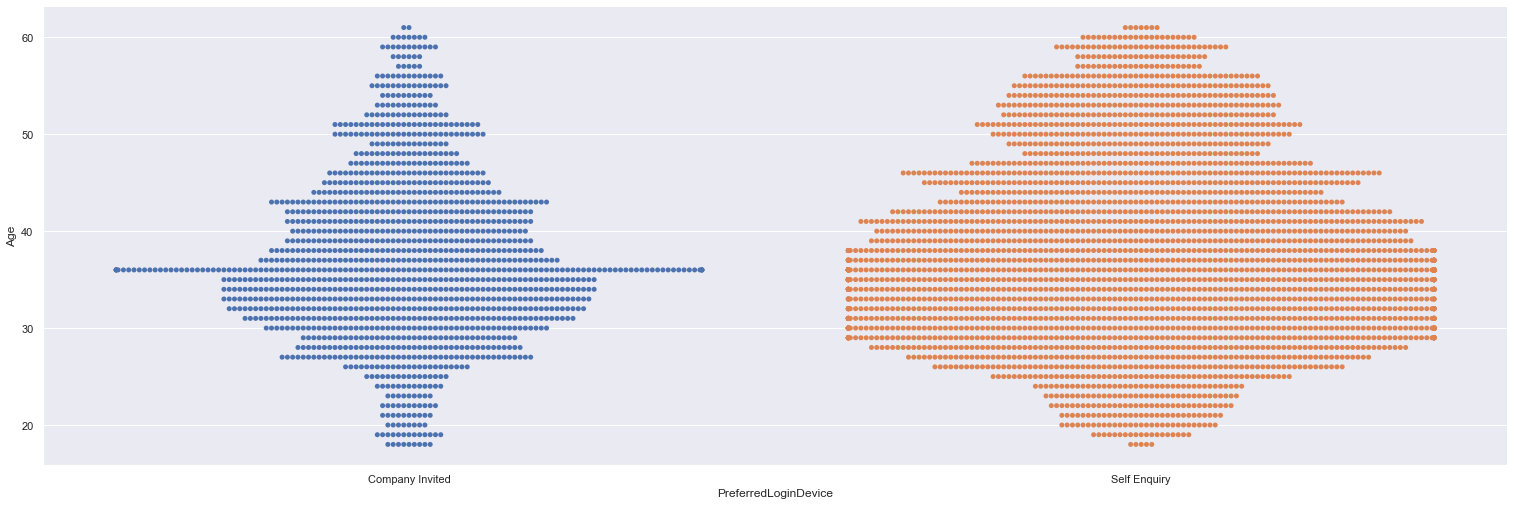

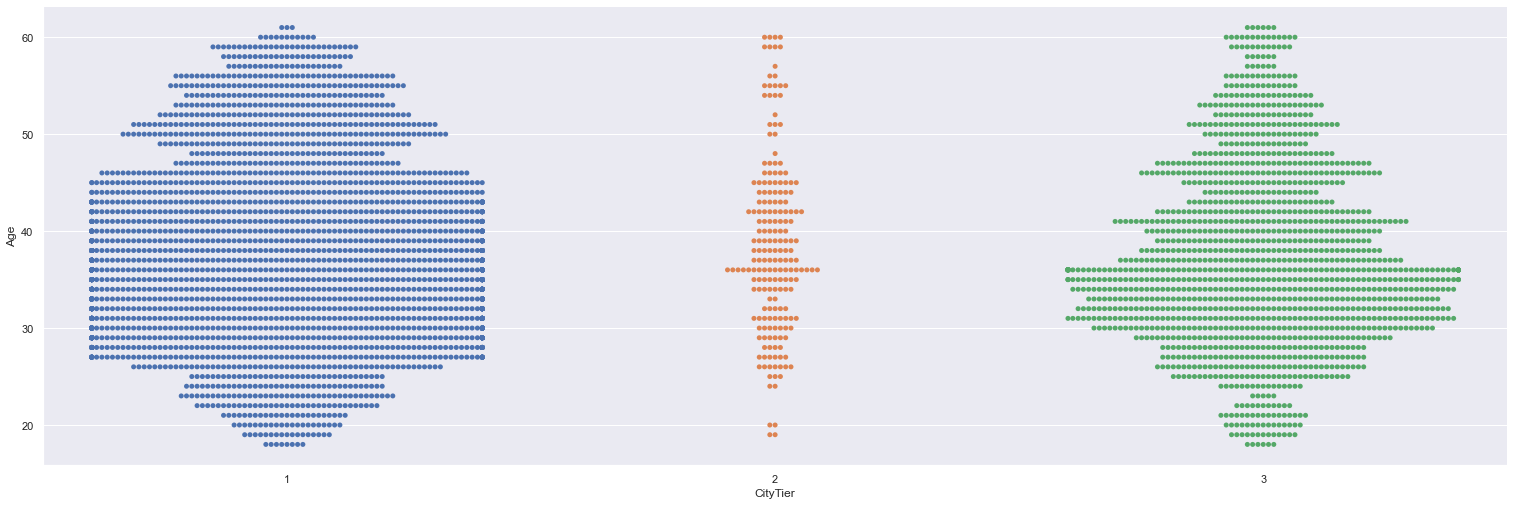

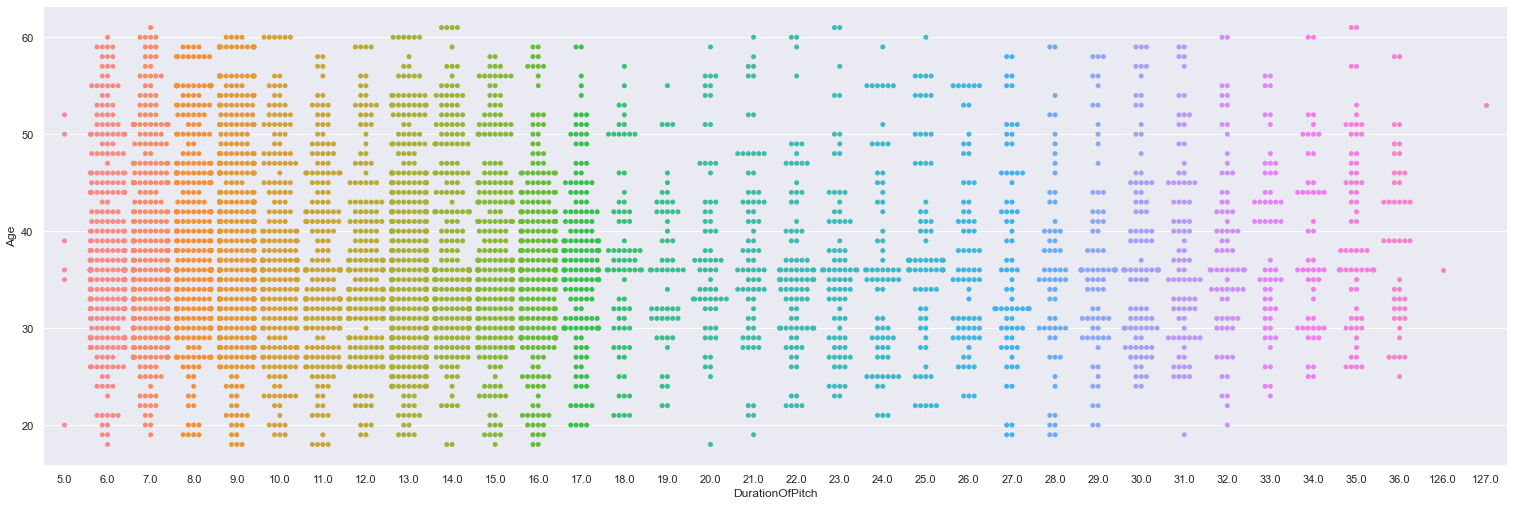

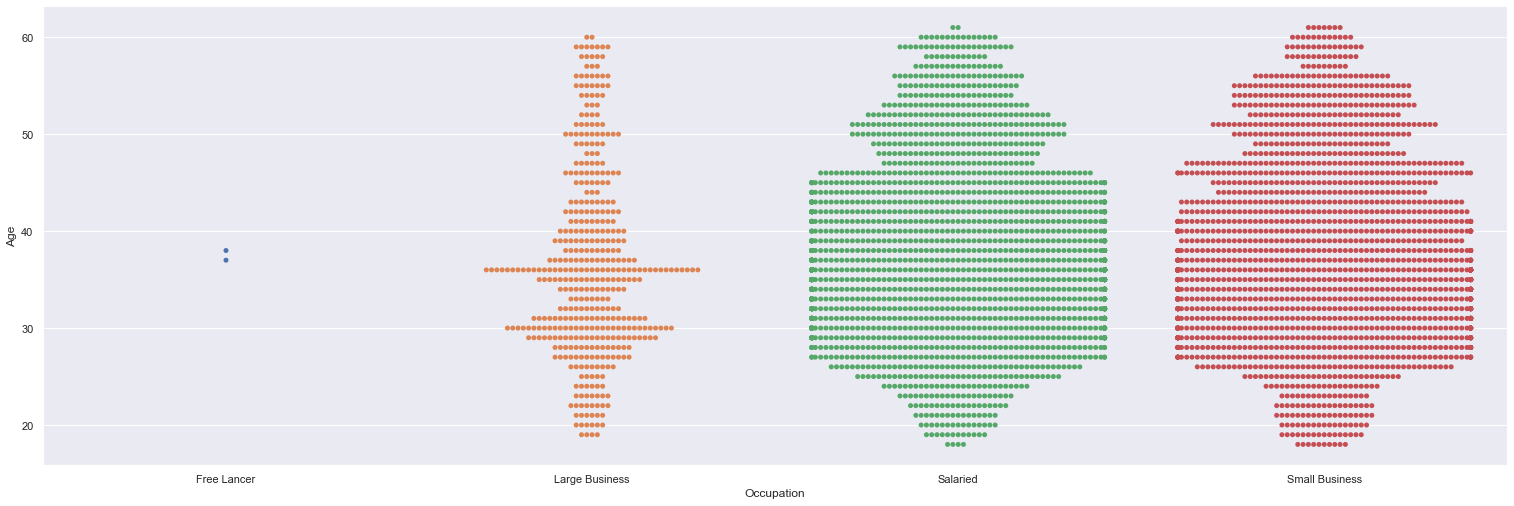

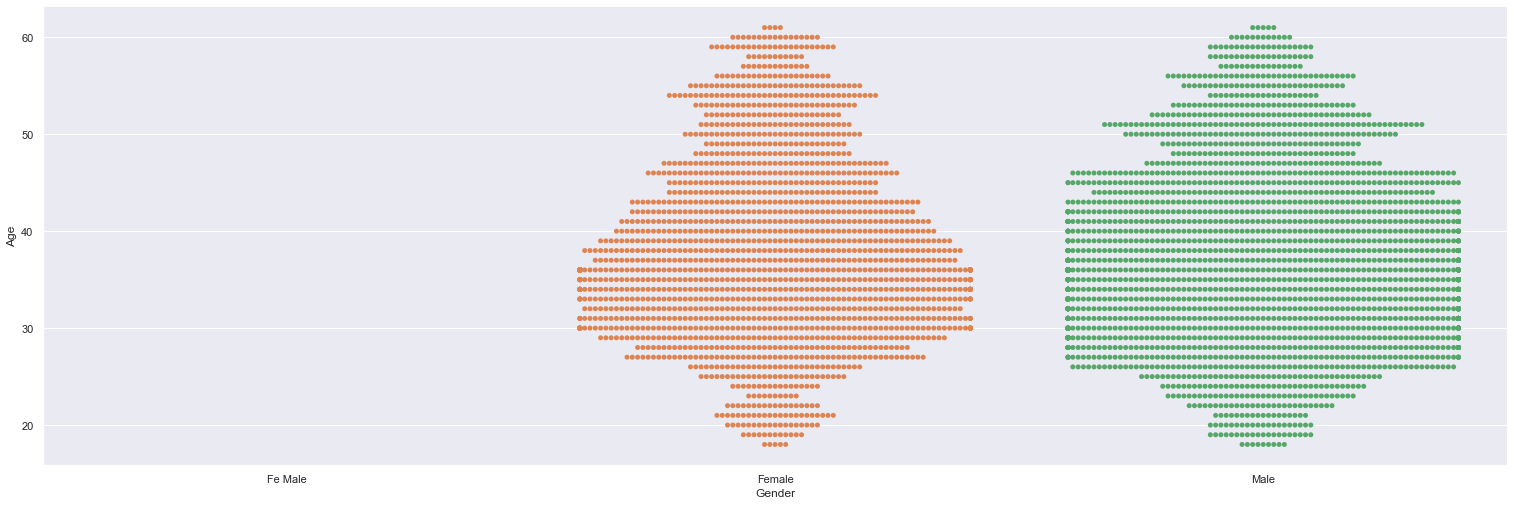

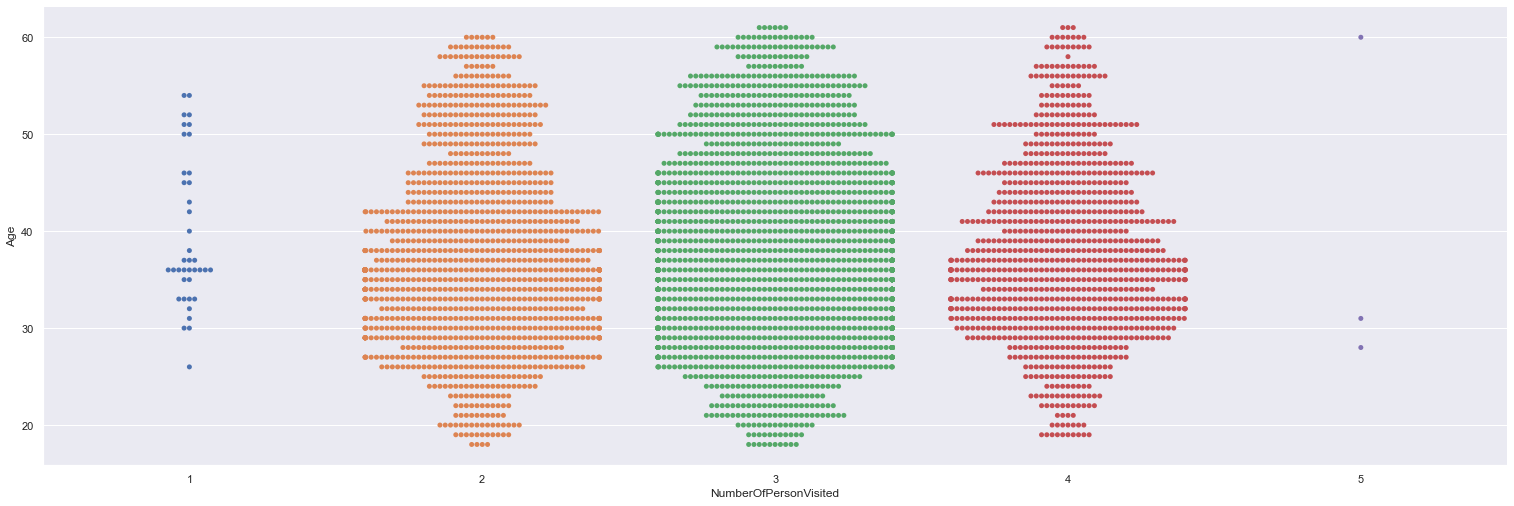

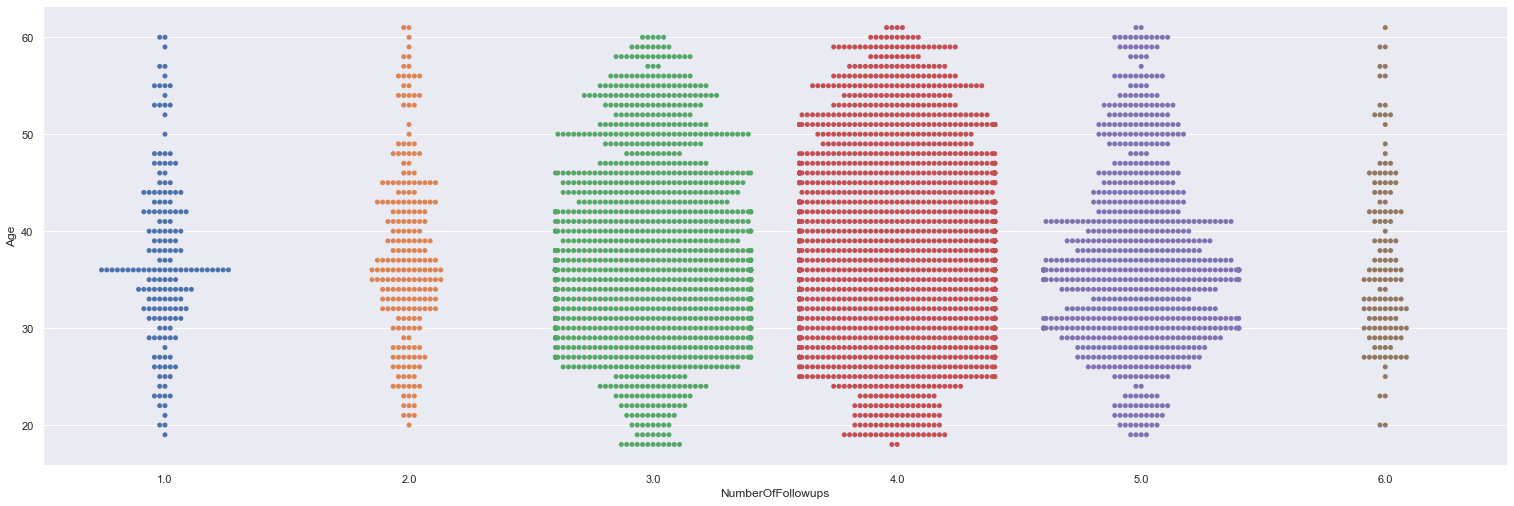

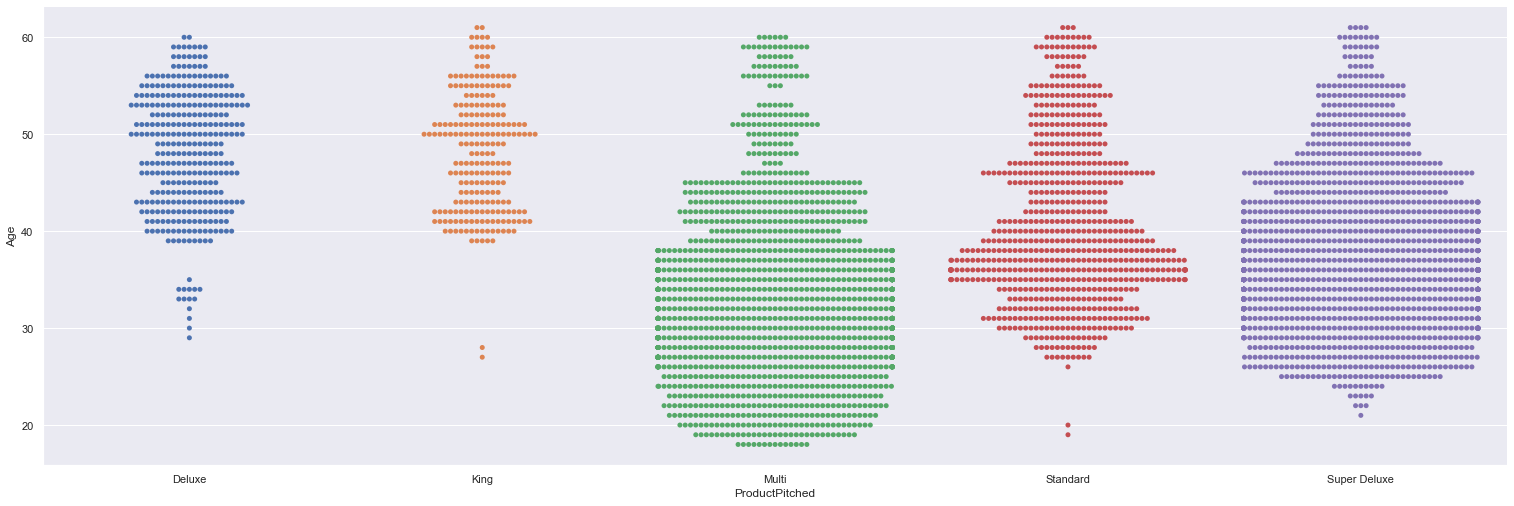

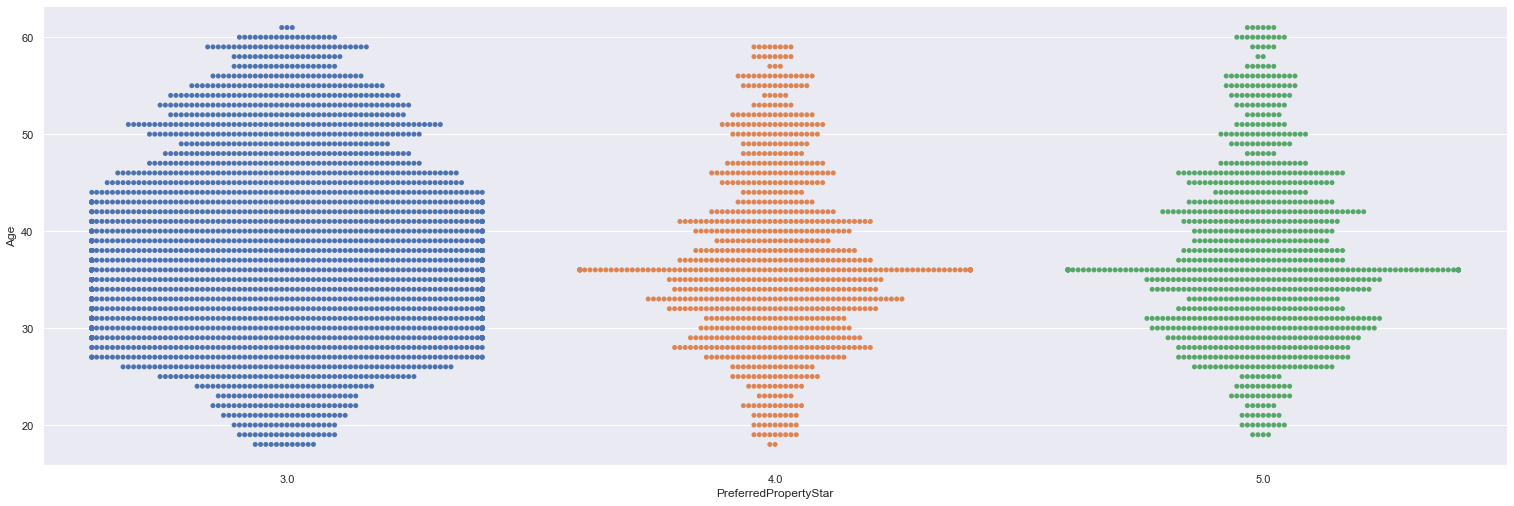

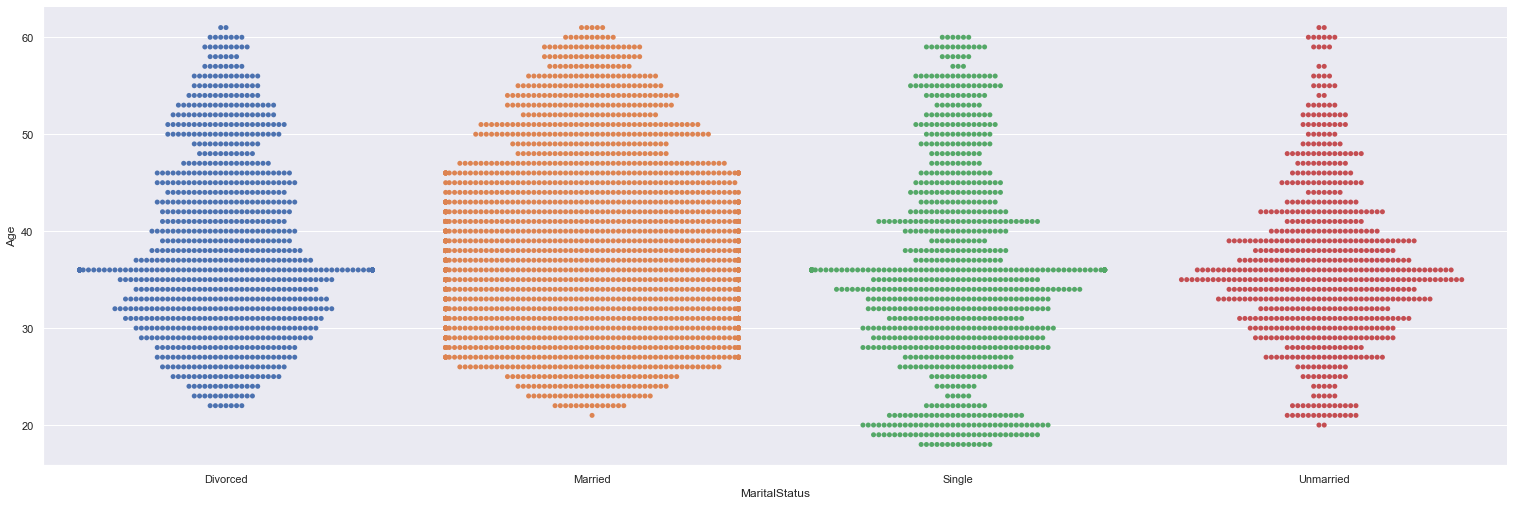

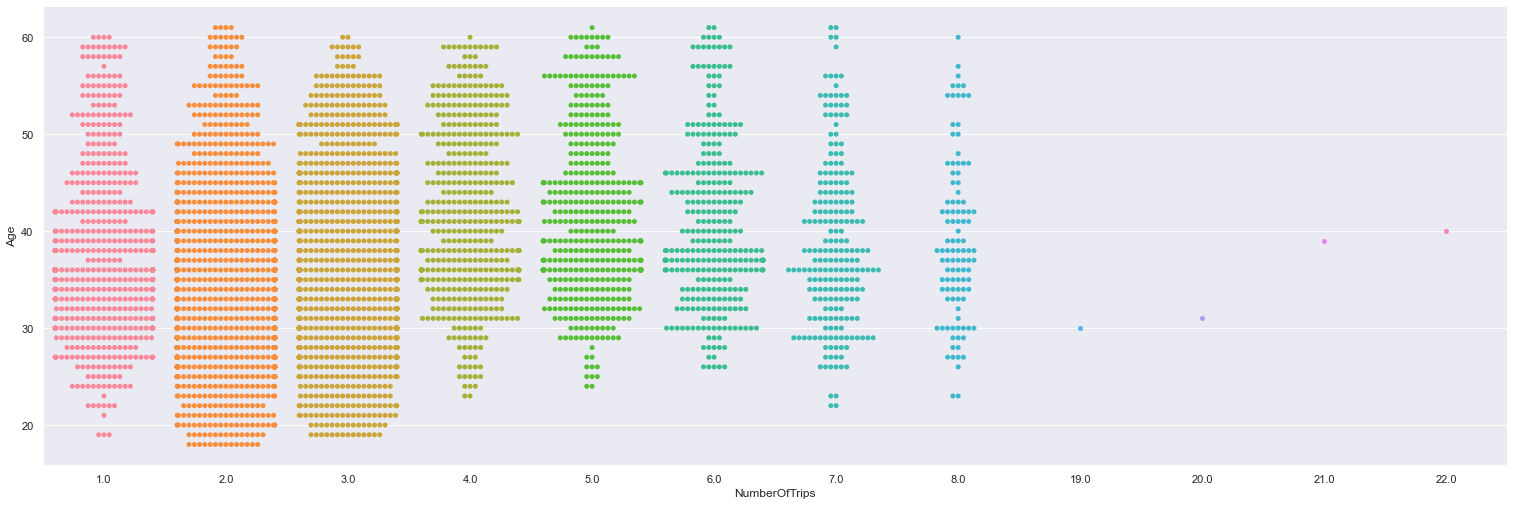

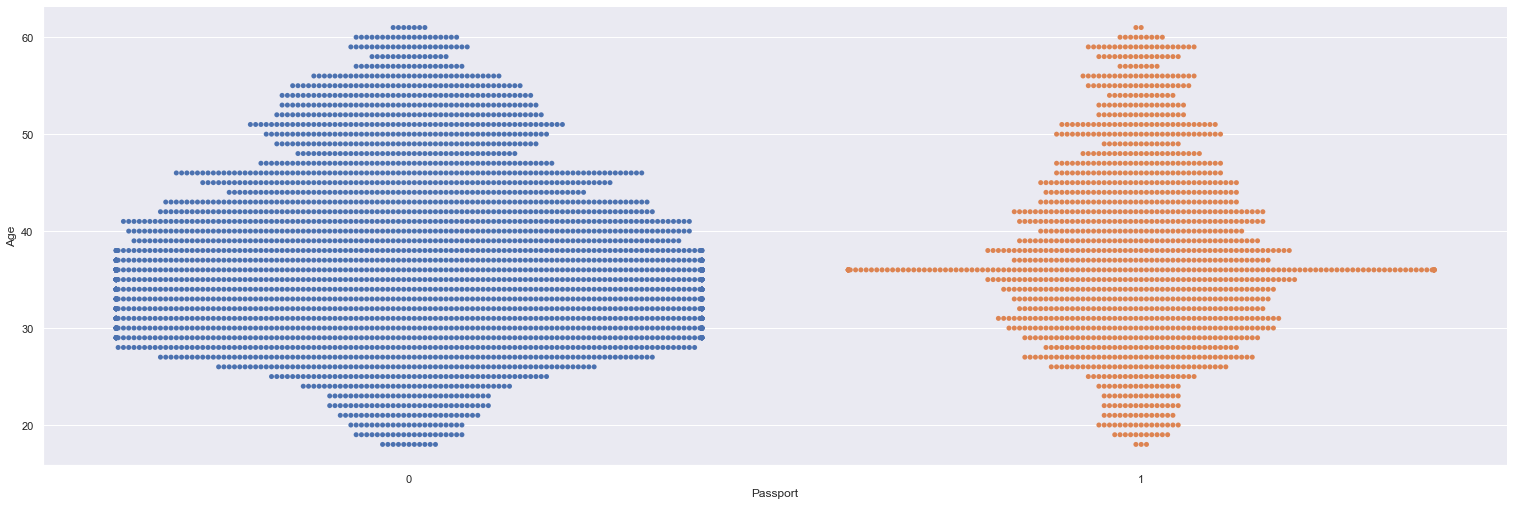

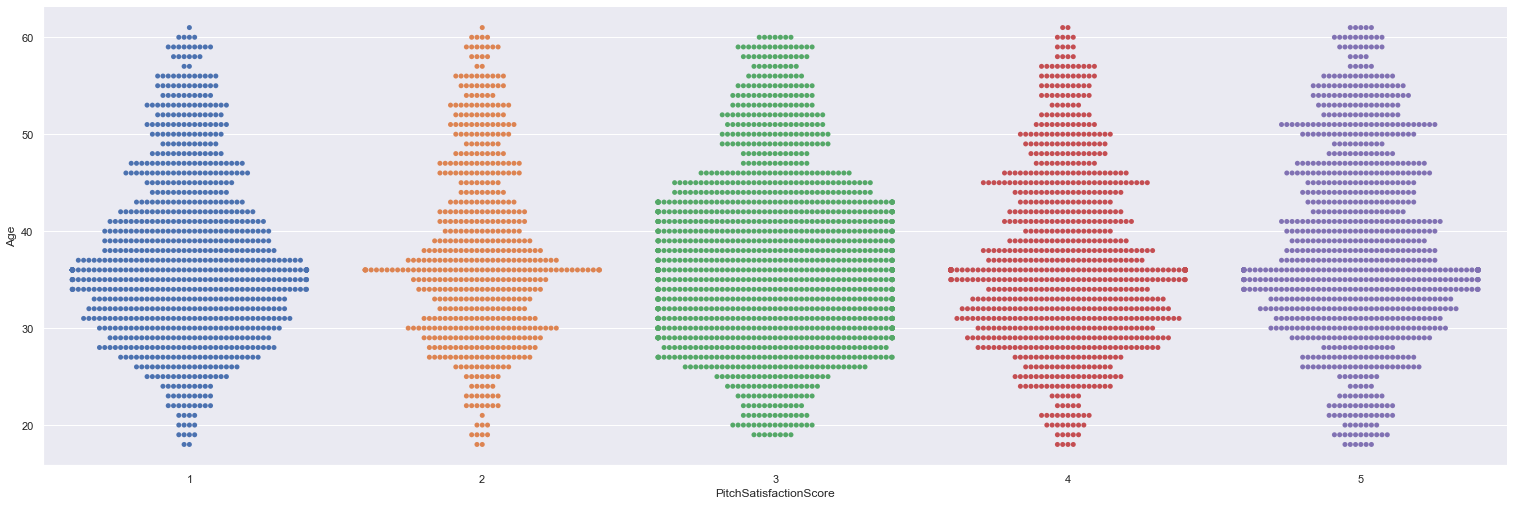

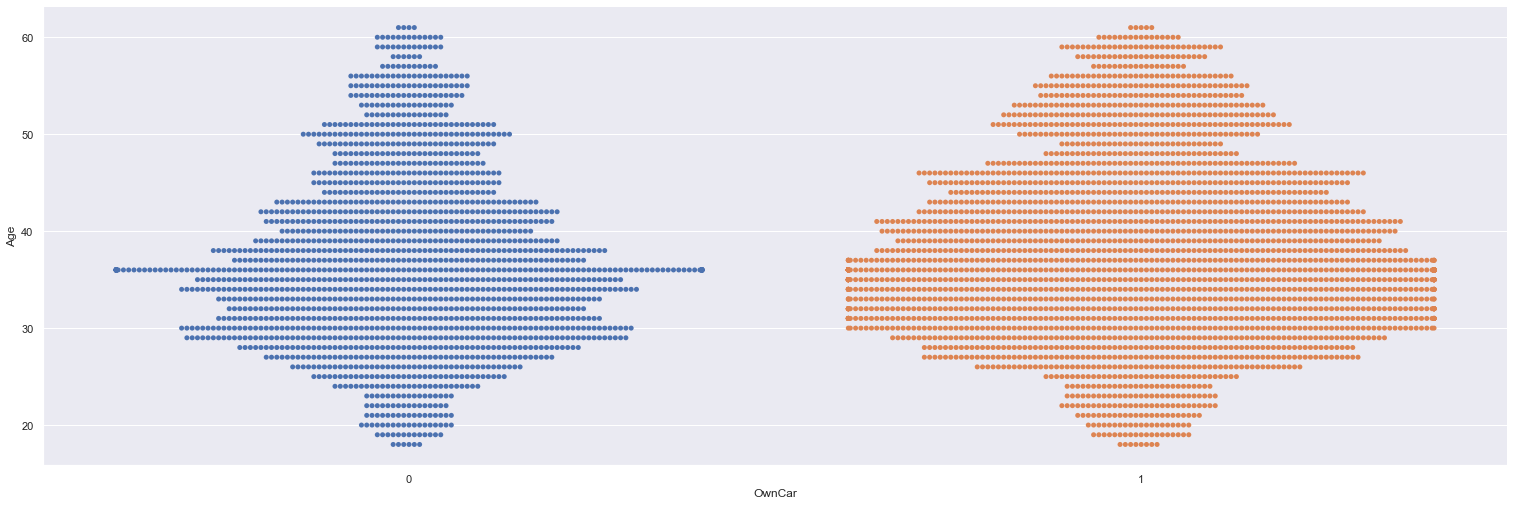

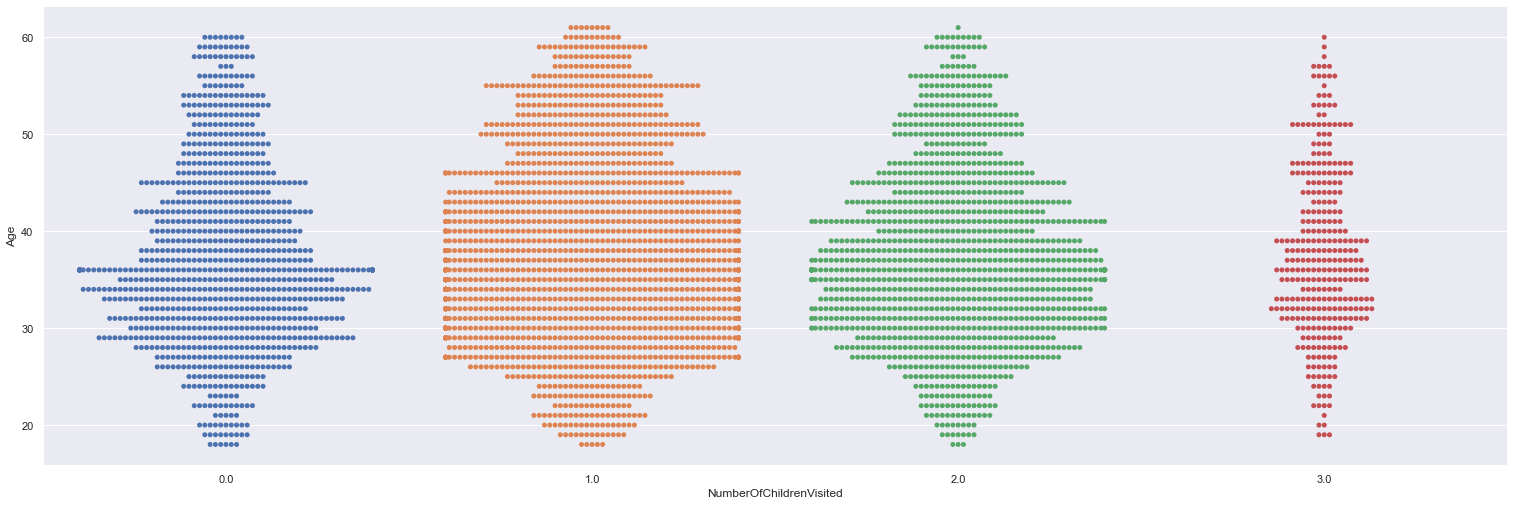

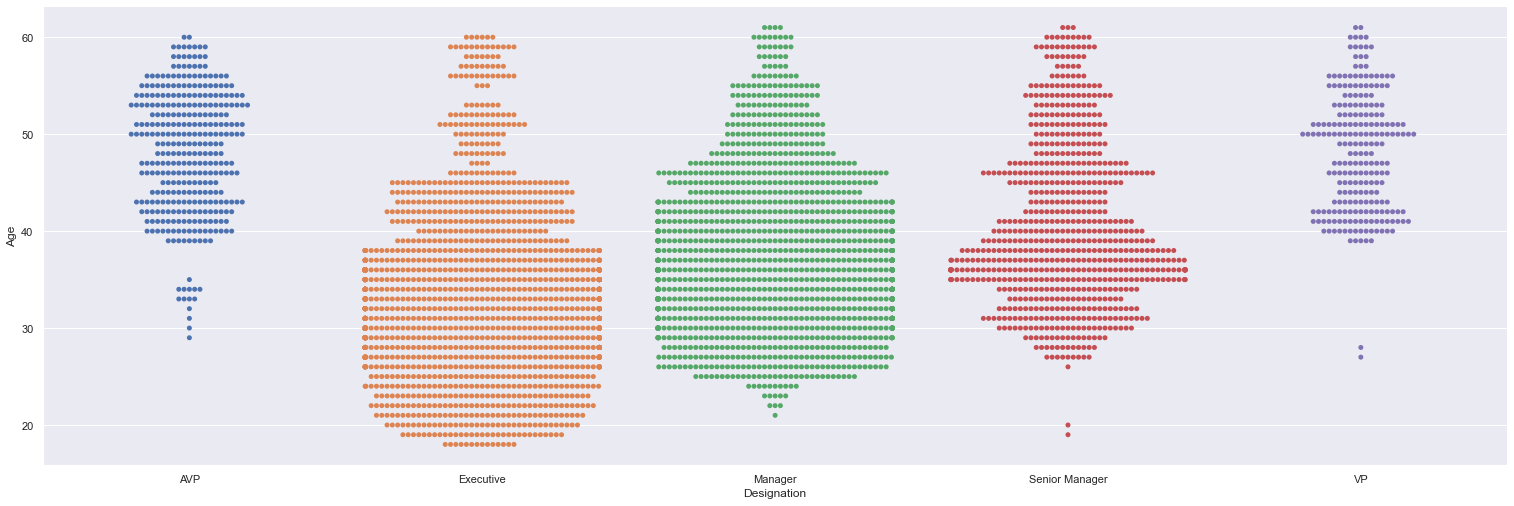

In [40]:
cat_cols=['ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation']

for column in cat_cols:
    sns.set(rc={'figure.figsize':(21,7)})
    sns.catplot(x=column, y="Age", kind="swarm", data=data, height=7, aspect=3);

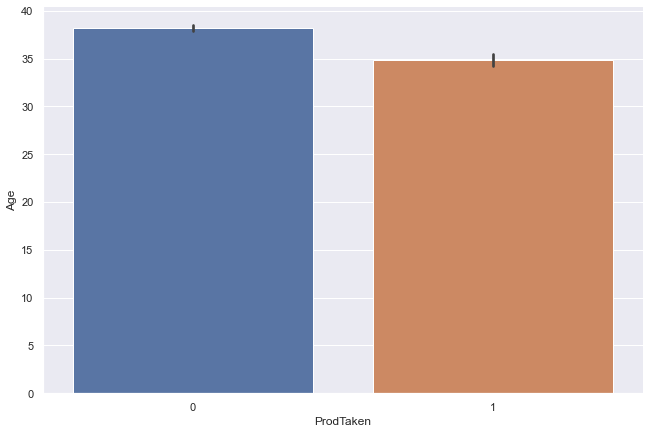

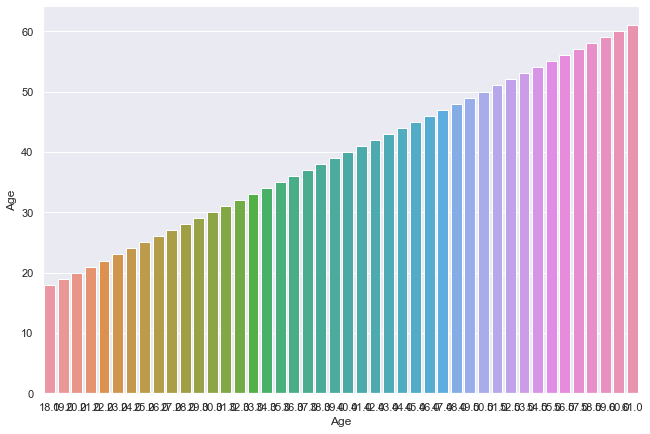

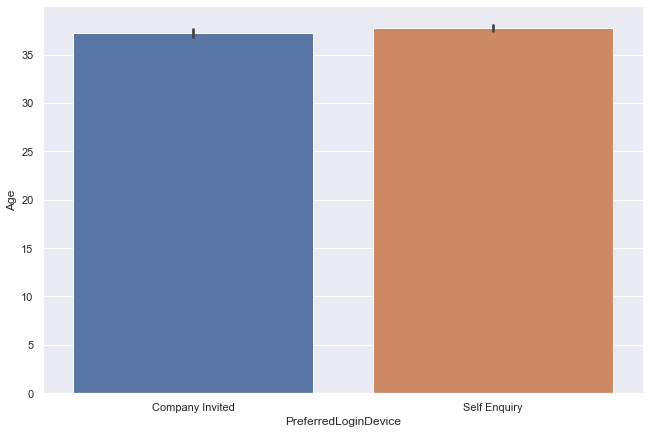

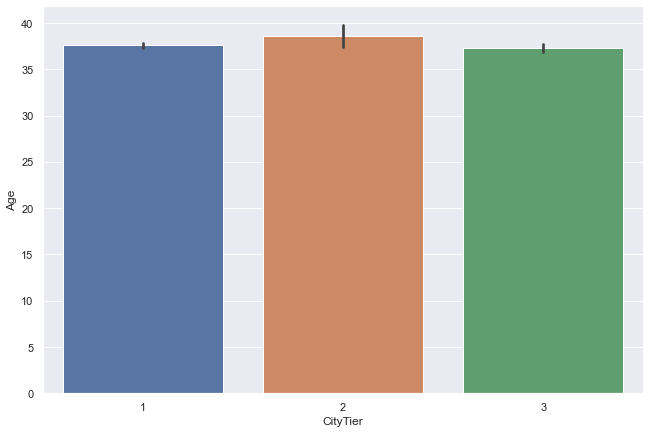

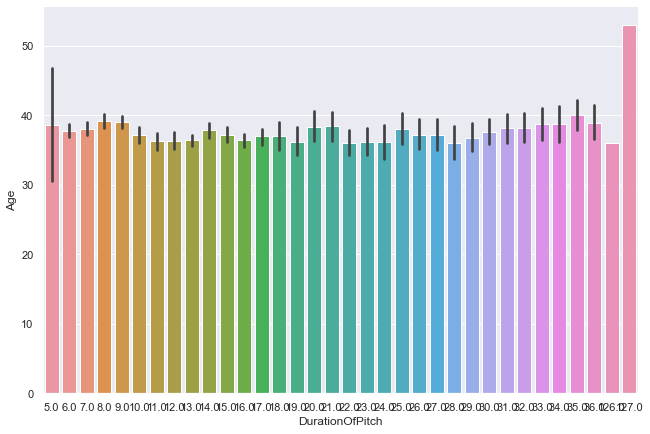

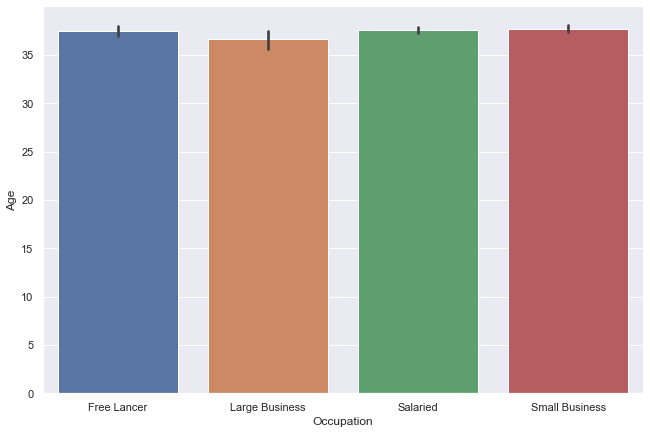

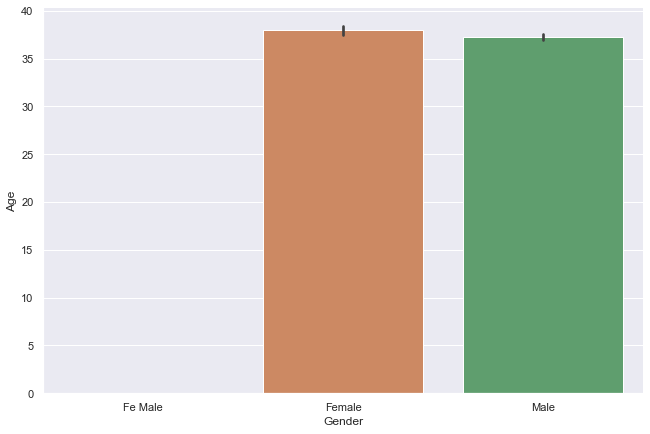

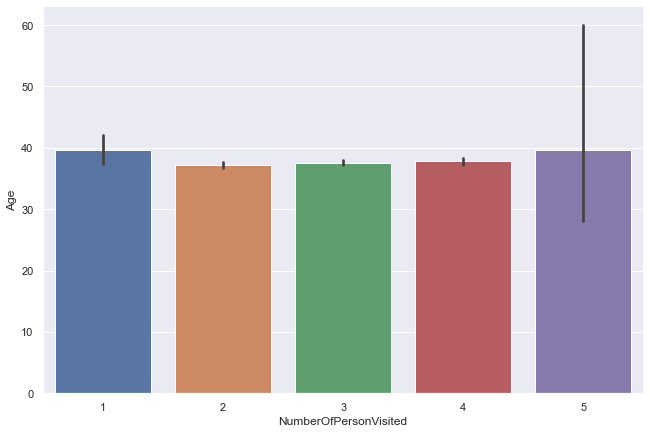

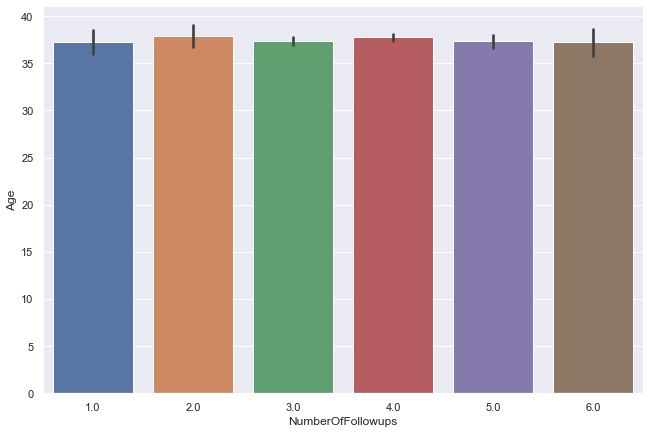

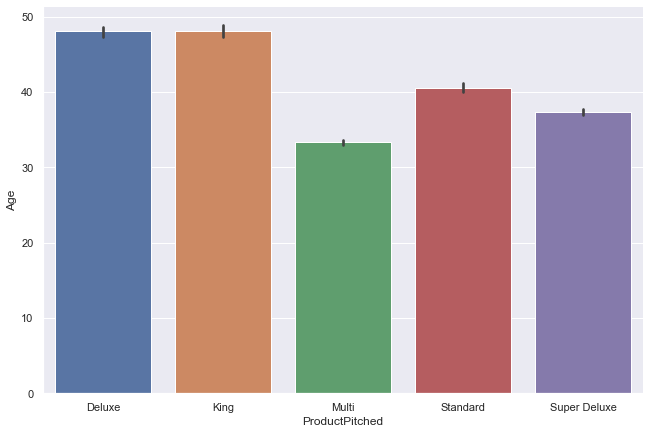

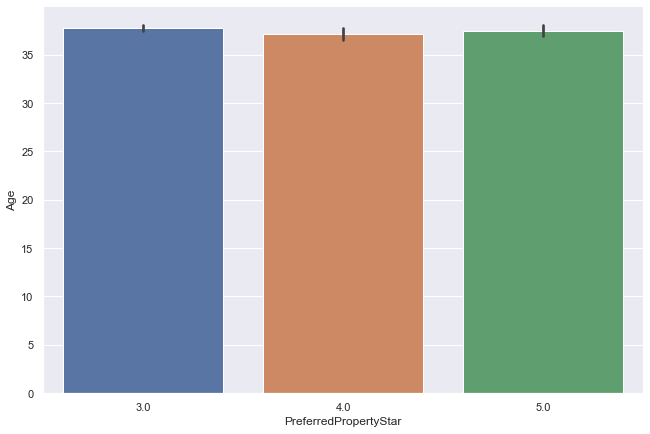

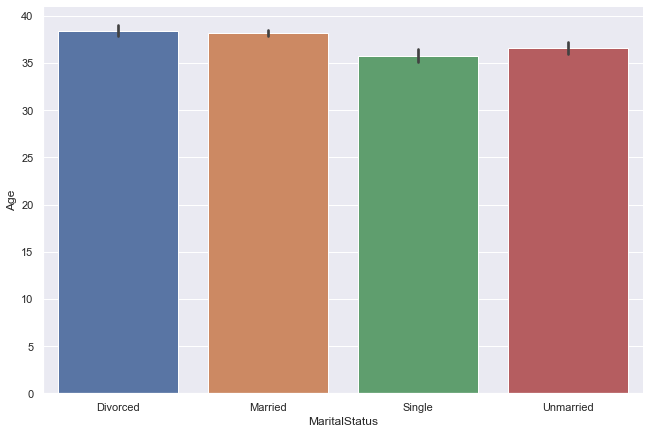

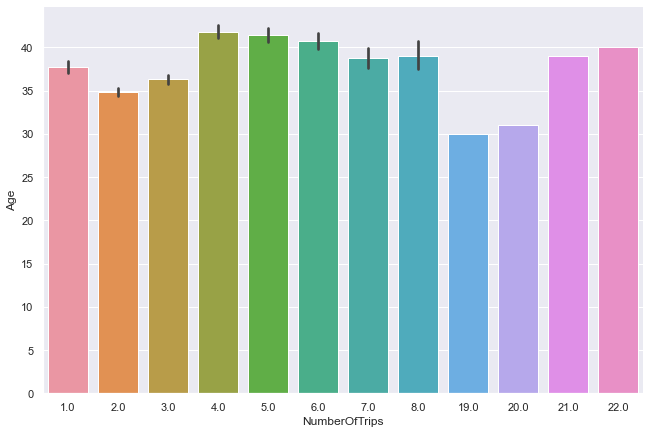

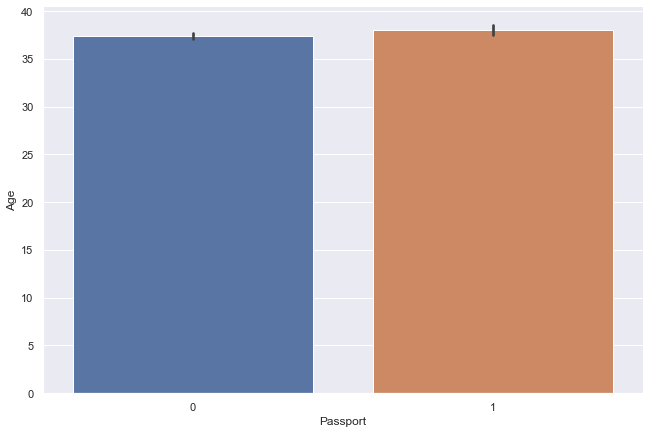

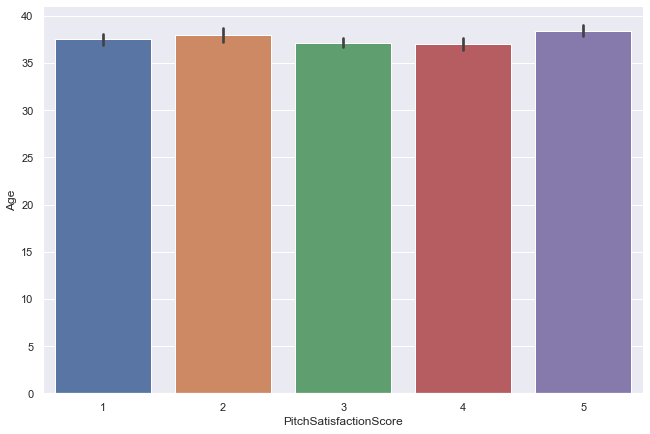

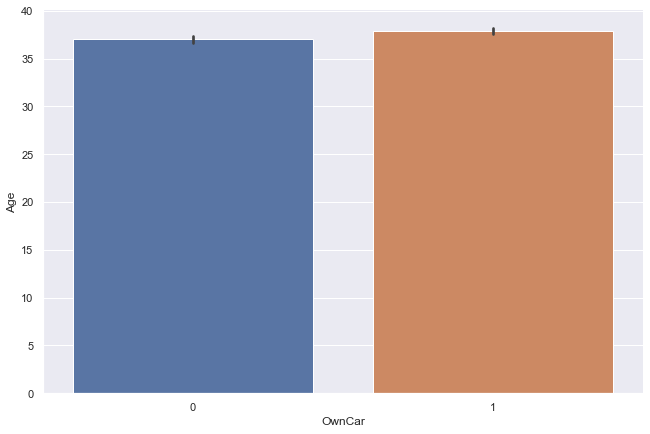

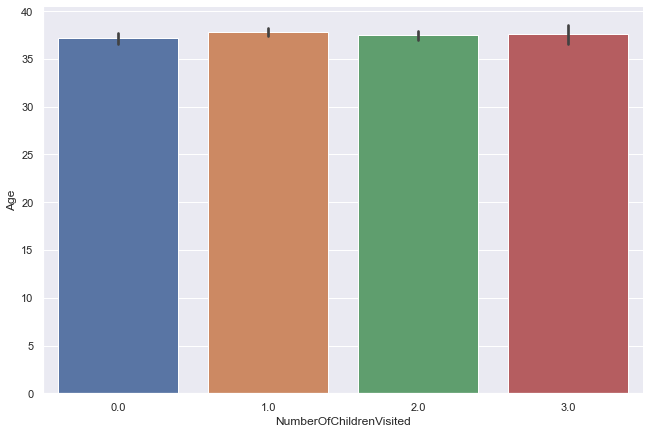

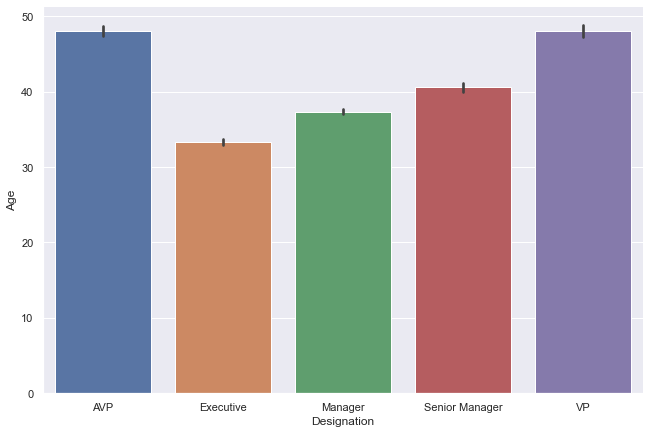

In [41]:
cat_cols=['ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation']

for column in cat_cols:
    sns.set(rc={'figure.figsize':(21,7)})
    sns.catplot(x=column, y="Age", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

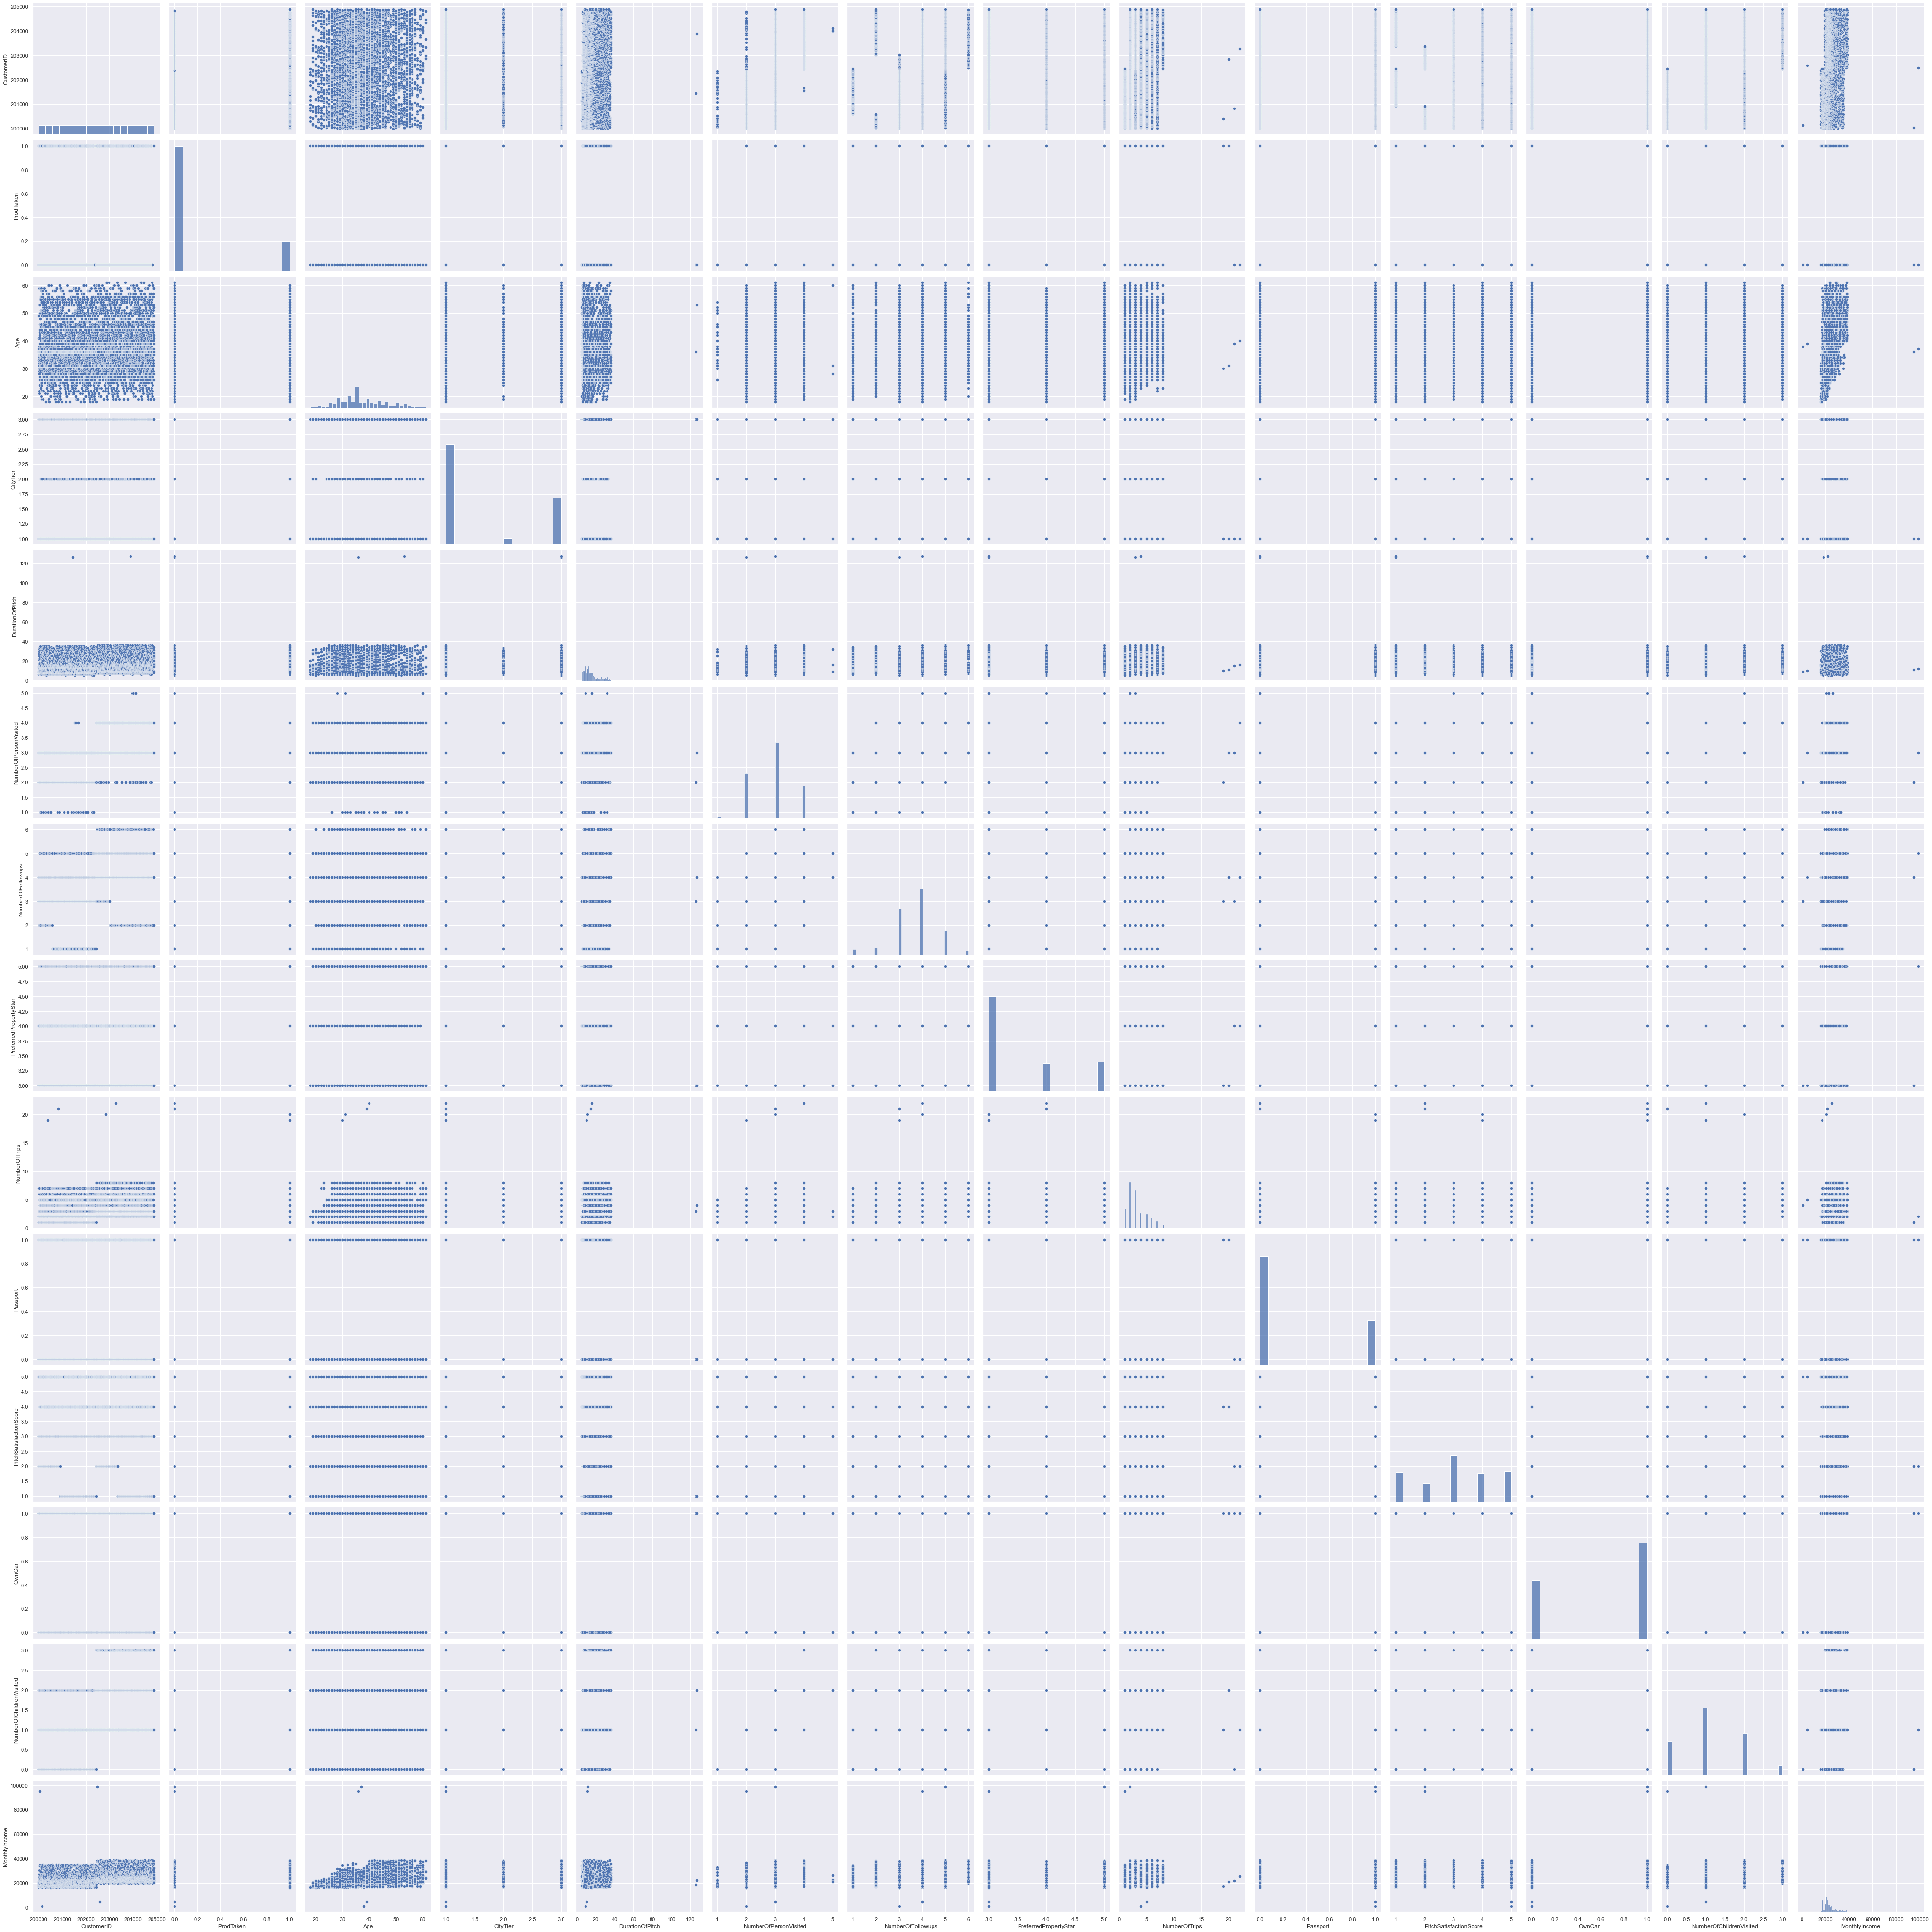

In [42]:
sns.pairplot(
    data,
    height=4,
    aspect=1
    );

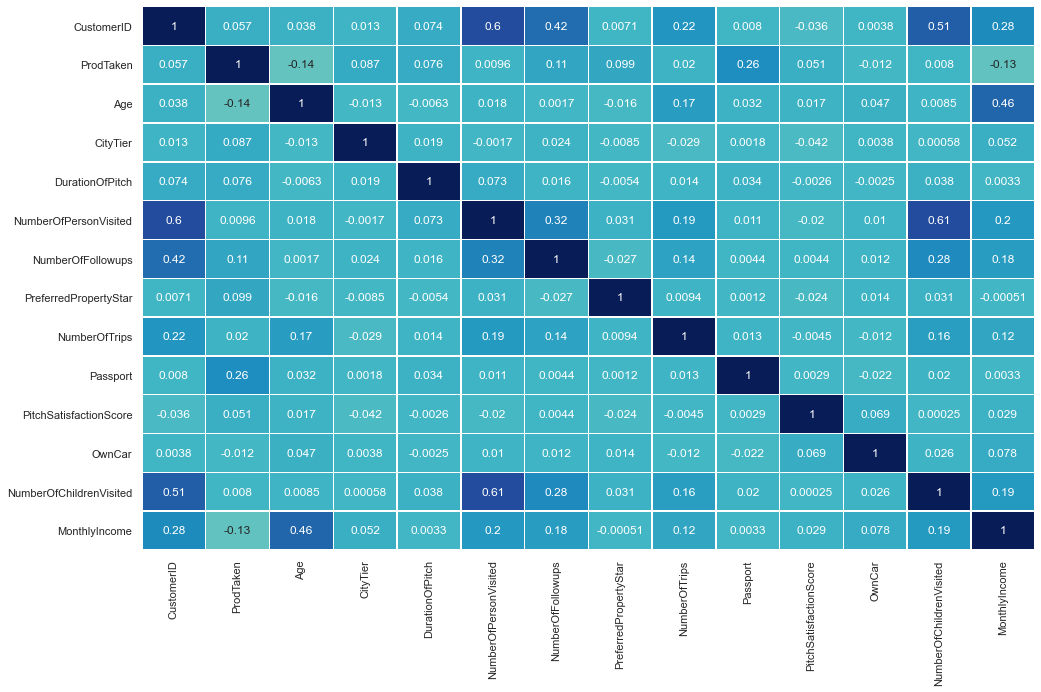

In [43]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## <a id = "link3"></a> Split the dataset

In [55]:
# Separating features and the target column
X = data.drop(['PreferredLoginDevice','Occupation','Gender','ProductPitched','MaritalStatus','Designation'], axis=1)
y = data[['ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]

In [56]:
# encoding the categorical variables
x = pd.get_dummies(X, drop_first=True)
x.head()

CustomerID  ProdTaken   Age  CityTier  DurationOfPitch  \
0      200000          1  41.0         3              6.0   
1      200001          0  49.0         1             14.0   
2      200002          1  37.0         1              8.0   
3      200003          0  33.0         1              9.0   
4      200004          0  36.0         1              8.0   

   NumberOfPersonVisited  NumberOfFollowups  PreferredPropertyStar  \
0                      3                3.0                    3.0   
1                      3                4.0                    4.0   
2                      3                4.0                    3.0   
3                      2                3.0                    3.0   
4                      2                3.0                    4.0   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisited  MonthlyIncome  
0                      0.0        20993.0  
1                      2.0        20130.0  
2                      0.0        17090.0  
3                      1.0        17909.0  
4                      0.0        18468.0

In [57]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [58]:
X_train.shape, X_test.shape

((3421, 14), (1467, 14))

- We have 3,421 observations in the train set and 1,467 observations in the test set.

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.

In [59]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

## <a id = "link4"></a>Decision Tree Model

In [60]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [61]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.2972166113750018
RMSE on training set :  0.0
RMSE on test set :  0.6974488520019424


- Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [62]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, random_state=1)

In [63]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.6685458382995247
R-square on test set :  0.3275598777383334
RMSE on training set :  0.7405049074380436
RMSE on test set :  0.7978900181331905


- The overfitting is reduced after hyperparameter tuning and test score has increased by approx 2%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [64]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Age                      0.535620
DurationOfPitch          0.431197
PitchSatisfactionScore   0.019955
CityTier                 0.004408
NumberOfFollowups        0.002802
CustomerID               0.001395
NumberOfPersonVisited    0.001157
MonthlyIncome            0.001009
NumberOfChildrenVisited  0.000938
Passport                 0.000580
NumberOfTrips            0.000365
PreferredPropertyStar    0.000322
ProdTaken                0.000129
OwnCar                   0.000123


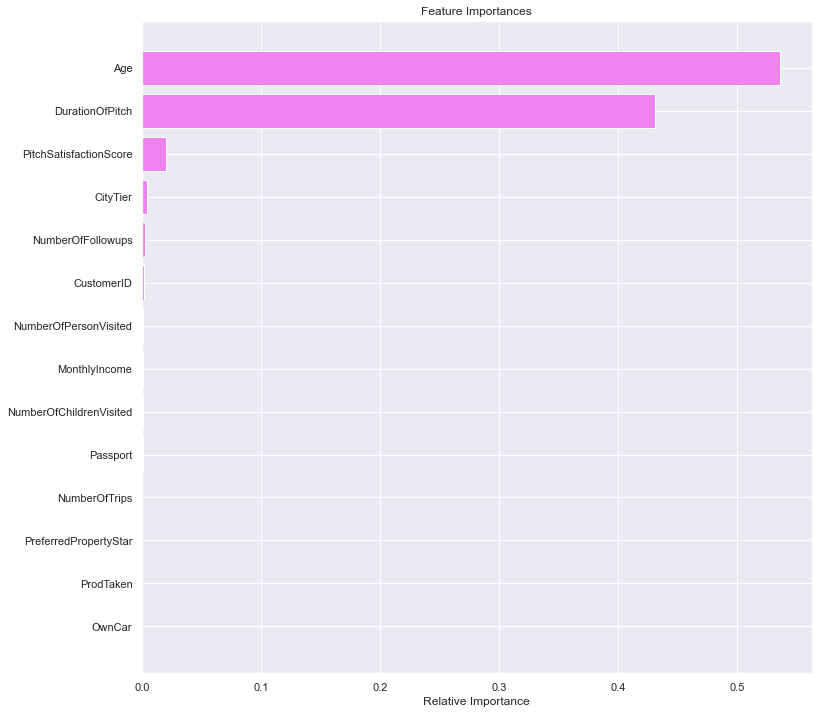

In [65]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## <a id = "link5"></a>Random Forest Model

In [66]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [67]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.948786215923948
R-square on test set :  0.6333233563401046
RMSE on training set :  0.285887373240426
RMSE on test set :  0.47406804495498744


- Random forest is giving good r2 score of 92% on the test data but it is slightly overfitting.
- Random forest is giving good r2 score of 44% on the test data and it is overfitting.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [68]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=1)

In [69]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9660018483379824
R-square on test set :  0.7634051833518913
RMSE on training set :  0.38198841378664705
RMSE on test set :  0.8321234144321212


- No significant change in the result. The result is almost same before or after the hyperparameter tuning.

In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Age                      0.385629
DurationOfPitch          0.363596
MonthlyIncome            0.088358
CustomerID               0.031689
NumberOfTrips            0.027898
PitchSatisfactionScore   0.022151
NumberOfFollowups        0.015053
CityTier                 0.011355
NumberOfChildrenVisited  0.010896
PreferredPropertyStar    0.010736
NumberOfPersonVisited    0.010290
ProdTaken                0.008552
Passport                 0.007343
OwnCar                   0.006453


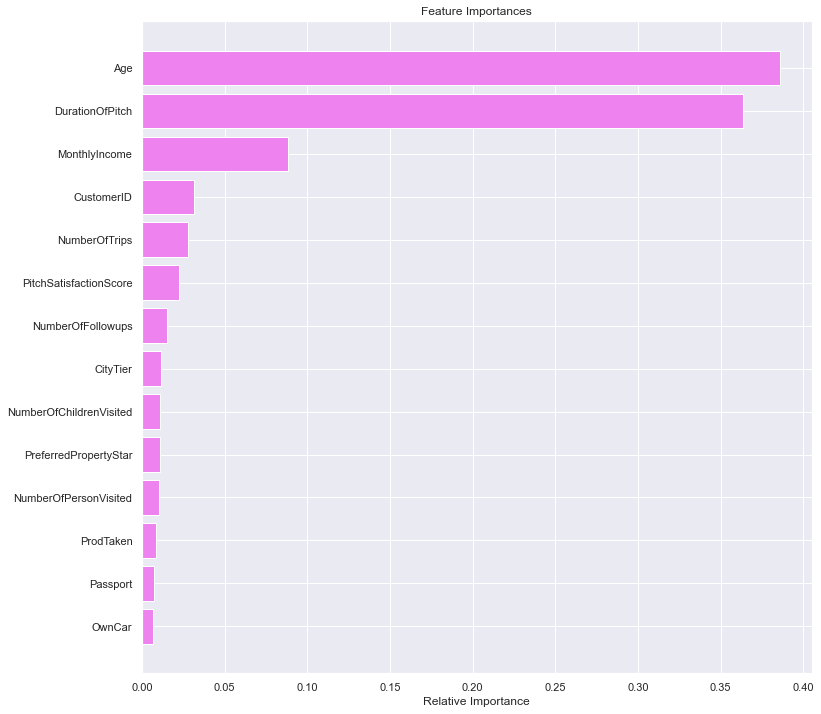

In [71]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, also DurationOfPitch, for the tuned random forest model.

## <a id = "link6"></a>Boosting Models

### AdaBoost Regressor

In [244]:
X_ada = data[['Age']]
y_ada = data[['CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]
# X_ada = data[['Occupation','Gender','ProductPitched','MaritalStatus','Designation']]
# y_ada = data[['ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]
# Separating features and the target column
# X = data.drop(['PreferredLoginDevice','Occupation','Gender','ProductPitched','MaritalStatus','Designation'], axis=1)
# y = data[['ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]

In [245]:
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada, y_ada, test_size=0.30, random_state=1, shuffle=True)

In [246]:
X_train_ada

Age
3878  53.0
3933  39.0
3     33.0
4823  20.0
4230  50.0
...    ...
2895  43.0
2763  33.0
905   29.0
3980  37.0
235   43.0

[3421 rows x 1 columns]

In [247]:
y_train_ada

CityTier  DurationOfPitch  NumberOfPersonVisited  NumberOfFollowups  \
3878         3            127.0                      3                4.0   
3933         1              9.0                      3                4.0   
3            1              9.0                      2                3.0   
4823         3             12.0                      4                4.0   
4230         1              7.0                      3                5.0   
...        ...              ...                    ...                ...   
2895         1             31.0                      3                4.0   
2763         3             15.0                      4                5.0   
905          1              6.0                      2                4.0   
3980         1             18.0                      4                5.0   
235          3             22.0                      3                3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  
3878         0                       1       1                      2.0  
3933         1                       1       0                      1.0  
3            1                       5       1                      1.0  
4823         1                       4       1                      1.0  
4230         1                       3       0                      1.0  
...        ...                     ...     ...                      ...  
2895         1                       2       1                      2.0  
2763         1                       2       1                      1.0  
905          0                       2       0                      1.0  
3980         0                       4       1                      2.0  
235          1                       3       0                      1.0  

[3421 rows x 8 columns]

In [248]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train_ada = model.predict(X_train_ada)
    pred_test_ada = model.predict(X_test_ada)
    
    train_acc_ada = model.score(X_train_ada,y_train_ada)
    test_acc_ada = model.score(X_test_ada,y_test_ada)
    
    train_recall_ada = metrics.recall_score(y_train_ada,pred_train_ada)
    test_recall_ada = metrics.recall_score(y_test_ada,pred_test_ada)
    
    train_precision_ada = metrics.precision_score(y_train_ada,pred_train_ada)
    test_precision_ada = metrics.precision_score(y_test_ada,pred_test_ada)
    
    score_list.extend((train_acc_ada,test_acc_ada,train_recall_ada,test_recall_ada,train_precision_ada,test_precision_ada))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_ada,y_train_ada))
        print("Accuracy on test set : ",model.score(X_test_ada,y_test_ada))
        print("Recall on training set : ",metrics.recall_score(y_train_ada,pred_train_ada))
        print("Recall on test set : ",metrics.recall_score(y_test_ada,pred_test_ada))
        print("Precision on training set : ",metrics.precision_score(y_train_ada,pred_train_ada))
        print("Precision on test set : ",metrics.precision_score(y_test_ada,pred_test_ada))
    
    return score_list # returning the list with train and test scores

In [249]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train_ada,y_train_ada)

ValueError: y should be a 1d array, got an array of shape (3421, 8) instead.

In [250]:
pred_train_ada = ab_regressor.predict(X_train_ada)
pred_test_ada = ab_regressor.predict(X_test_ada)
    
train_acc_ada = ab_regressor.score(X_train_ada,y_train_ada)
test_acc_ada = ab_regressor.score(X_test_ada,y_test_ada)
    
train_recall_ada = metrics.recall_score(y_train_ada,pred_train_ada)
# test_recall_ada = metrics.recall_score(y_test_ada,pred_test_ada)
    
#     train_precision_ada = metrics.precision_score(y_train_ada,pred_train_ada)
#     test_precision_ada = metrics.precision_score(y_test_ada,pred_test_ada)
    


NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [211]:
ab_regressor_score=get_metrics_score(ab_regressor)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [212]:
ab_regressor_score=get_model_score(ab_regressor)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 14 

### Hyperparameter Tuning

In [183]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (3421, 10) instead.

In [ ]:
ab_tuned_score=get_model_score(ab_tuned)

In [184]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

AttributeError: 'AdaBoostRegressor' object has no attribute 'estimators_'

In [185]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'AdaBoostRegressor' object has no attribute 'estimators_'

### Gradient Boosting Regressor

In [207]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train_ada,y_train_ada)

GradientBoostingRegressor(random_state=1)

In [208]:
gb_estimator_score=get_model_score(gb_estimator)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 14 

### Hyperparameter Tuning

In [188]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (3421, 10) instead.

In [ ]:
gb_tuned_score=get_model_score(gb_tuned)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [189]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

AssertionError: 

In [190]:
xgb_estimator_score=get_model_score(xgb_estimator)

NotFittedError: need to call fit or load_model beforehand

### Hyperparameter Tuning

In [191]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

AssertionError: 

In [ ]:
xgb_tuned_score=get_model_score(xgb_tuned)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_model_score(stacking_estimator)

## Comparing all models

In [ ]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

In [ ]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

## <a id = "link8"></a> Business Recommendations